In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tqdm.notebook import tqdm

from source.Hopfield import HopfieldNetwork, _predict_batch, _predict_sequential, _get_energy

# 3.0 Training the Network with Hebbian Learning

#### 3.0.1. Defining the Training Patterns
##### - The code defines the three given patterns as numpy arrays.
##### - These patterns are used to train the network.

In [3]:
x1 = np.array([-1,-1,1,-1,1,-1,-1,1], dtype=float)
x2 = np.array([-1,-1,-1,-1,-1,1,-1,-1], dtype=float)
x3 = np.array([-1,1,1,-1,-1,1,-1,1], dtype=float)
patterns = np.array([x1,x2,x3])

#### 3.0.2. Initializing the Hopfield Network
##### - HopfieldNetwork is an object representing the Hopfield network.
##### - max_iterations=1 ensures only one iteration is used to test if the stored patterns remain unchanged.

In [4]:
network = HopfieldNetwork(max_iterations = 1)


#### 3.0.3. Training the Network
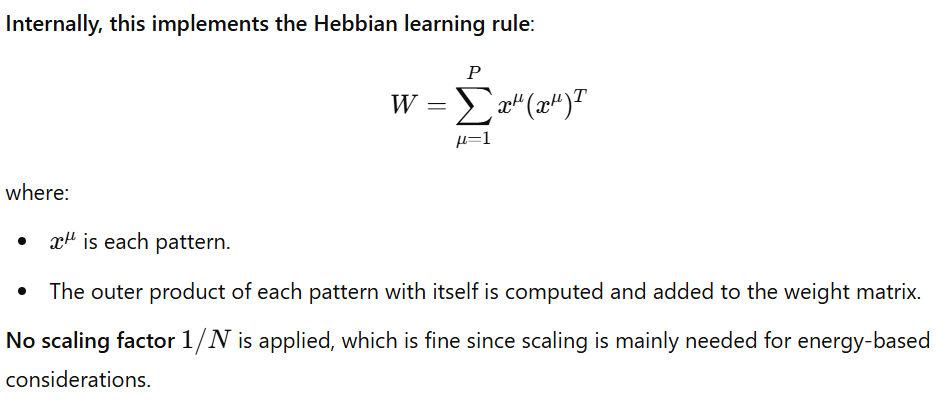
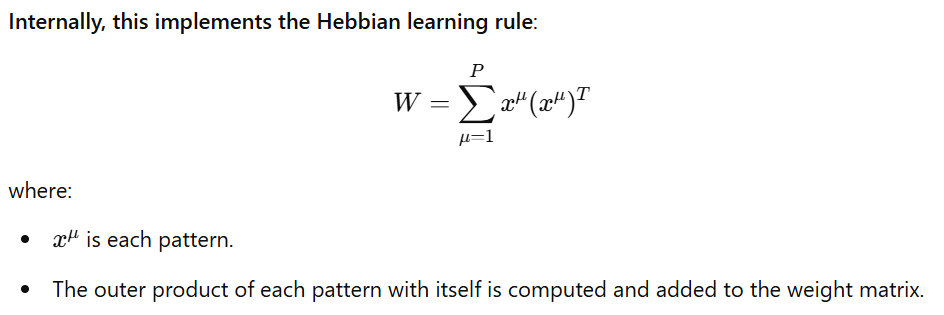

In [5]:
network.fit(patterns, patterns)


#### 3.0.4. Testing the Network’s Memory: Applying the Hopfield update rule

In [6]:
results = network.predict(patterns)


#### 3.0.5. Comparing Stored and Retrieved Patterns
##### - If the retrieved pattern matches the original pattern, it confirms that the network successfully stores the patterns.

In [7]:
for old, updated in zip(patterns, results):
    print(f"Old: {old} → Updated: {updated}")
    print("Patterns are equal." if np.array_equal(old, updated) else "Patterns are different.")


Old: [-1. -1.  1. -1.  1. -1. -1.  1.] → Updated: [-1 -1  1 -1  1 -1 -1  1]
Patterns are equal.
Old: [-1. -1. -1. -1. -1.  1. -1. -1.] → Updated: [-1 -1 -1 -1 -1  1 -1 -1]
Patterns are equal.
Old: [-1.  1.  1. -1. -1.  1. -1.  1.] → Updated: [-1  1  1 -1 -1  1 -1  1]
Patterns are equal.


# 3.1 Convergence and attractors

#### 3.1.1. Testing Pattern Recall with Noise: Apply the update rule repeatedly until you reach a stable fixed point. Did all the patterns converge towards stored patterns?

##### - Defines distorted versions of the stored patterns.
##### - Trains the Hopfield network.
##### - Tests if the network recalls the original stored patterns despite errors.
##### - Checks convergence by comparing the output with the original patterns.

In [8]:
import itertools
from collections import Counter

# Define original stored patterns
patterns = np.array([
    [-1, -1,  1, -1,  1, -1, -1,  1],  
    [-1, -1, -1, -1, -1,  1, -1, -1],  
    [-1,  1,  1, -1, -1,  1, -1,  1]
])

# Define distorted versions (one-bit and two-bit errors)
patterns_d = np.array([
    [1, 1, 1, -1, 1, -1, -1, 1],  # x1d (1-bit error)
    [1,  1, -1, -1, -1, 1, -1, -1],  # x2d (2-bit error)
    [1,  1,  1, -1, 1, 1, -1, 1]   # x3d (2-bit error)
])

# Train the network
network = HopfieldNetwork()
network.fit(patterns, patterns)

# Test recall with noisy inputs
results = network.predict(patterns_d)

# Check recall accuracy
for noisy, original, updated in zip(patterns_d, patterns, results):
    print(f"Input: {noisy}, Expected: {original}, Output: {updated}")
    print("✅ Patterns match." if np.array_equal(original, updated) else "❌ Patterns do not match.")


Input: [ 1  1  1 -1  1 -1 -1  1], Expected: [-1 -1  1 -1  1 -1 -1  1], Output: [-1 -1  1 -1  1 -1 -1  1]
✅ Patterns match.
Input: [ 1  1 -1 -1 -1  1 -1 -1], Expected: [-1 -1 -1 -1 -1  1 -1 -1], Output: [-1 -1 -1 -1 -1  1 -1 -1]
✅ Patterns match.
Input: [ 1  1  1 -1  1  1 -1  1], Expected: [-1  1  1 -1 -1  1 -1  1], Output: [-1  1  1 -1 -1  1 -1  1]
✅ Patterns match.


#### 3.1.2. Checking the Number of Attractors: How many attractors are there in this network? Hint: automate the searching.


##### - Determines how many stable states exist in the network.
##### - Confirms if all stored patterns are attractors.
##### - Finds unwanted spurious attractors (false memories stored by the network).

In [9]:
# Generate all possible 8-bit binary patterns
all_patterns = np.array(list(itertools.product([-1, 1], repeat=8)))

# Train the network
network.fit(patterns, patterns)
results = network.predict(all_patterns)

# Identify unique attractors
attractor_counts = Counter(tuple(a) for a in results)

# Display attractor count
print(f"🔹 Number of attractors in this network: {len(attractor_counts)}")


🔹 Number of attractors in this network: 14


#### 3.1.3 Investigating Heavily Distorted Inputs (More than Half of the Bits Flipped: What happens when you make the starting pattern even more dissimilar to the stored ones (e.g. more than half is wrong)?


##### - Tests how much noise the Hopfield network can handle before failing.
##### - Shows if the network still converges despite high distortion.
##### - Helps understand pattern robustness and network limitations.

In [10]:
# Define highly distorted versions (5-bit errors)
patterns_d2 = np.array([
    [1,  1, -1,  1, -1, -1, -1,  1],  # x1d2
    [1,  1,  1,  1,  1,  1, -1, -1],  # x2d2
    [1, -1, -1,  1,  1,  1, -1,  1]   # x3d2
])

# Train the network
network.fit(patterns, patterns)
results = network.predict(patterns_d2)

# Check recall accuracy for heavily distorted inputs
for noisy, original, updated in zip(patterns_d2, patterns, results):
    print(f"Input: {noisy}, Expected: {original}, Output: {updated}")
    print("✅ Patterns match." if np.array_equal(original, updated) else "❌ Patterns do not match.")


Input: [ 1  1 -1  1 -1 -1 -1  1], Expected: [-1 -1  1 -1  1 -1 -1  1], Output: [ 1  1 -1  1 -1 -1  1 -1]
❌ Patterns do not match.
Input: [ 1  1  1  1  1  1 -1 -1], Expected: [-1 -1 -1 -1 -1  1 -1 -1], Output: [ 1  1 -1  1 -1 -1  1 -1]
❌ Patterns do not match.
Input: [ 1 -1 -1  1  1  1 -1  1], Expected: [-1  1  1 -1 -1  1 -1  1], Output: [ 1 -1 -1  1  1 -1  1 -1]
❌ Patterns do not match.


###### changing a bit from 1 to -1 makes it more difficult for the pattern to match; so this is more noisy than changing more number of bits from -1 to 1
###### if we change ALL -1s to 1s it makes it almost impossible for the pattern to match again
###### changing 3 bits from -1 to 1 will not match the pattern
###### changing 2 bits from 1 to -1 will directly affect the pattern matching 

##### Visualizing Attractor Occurrences

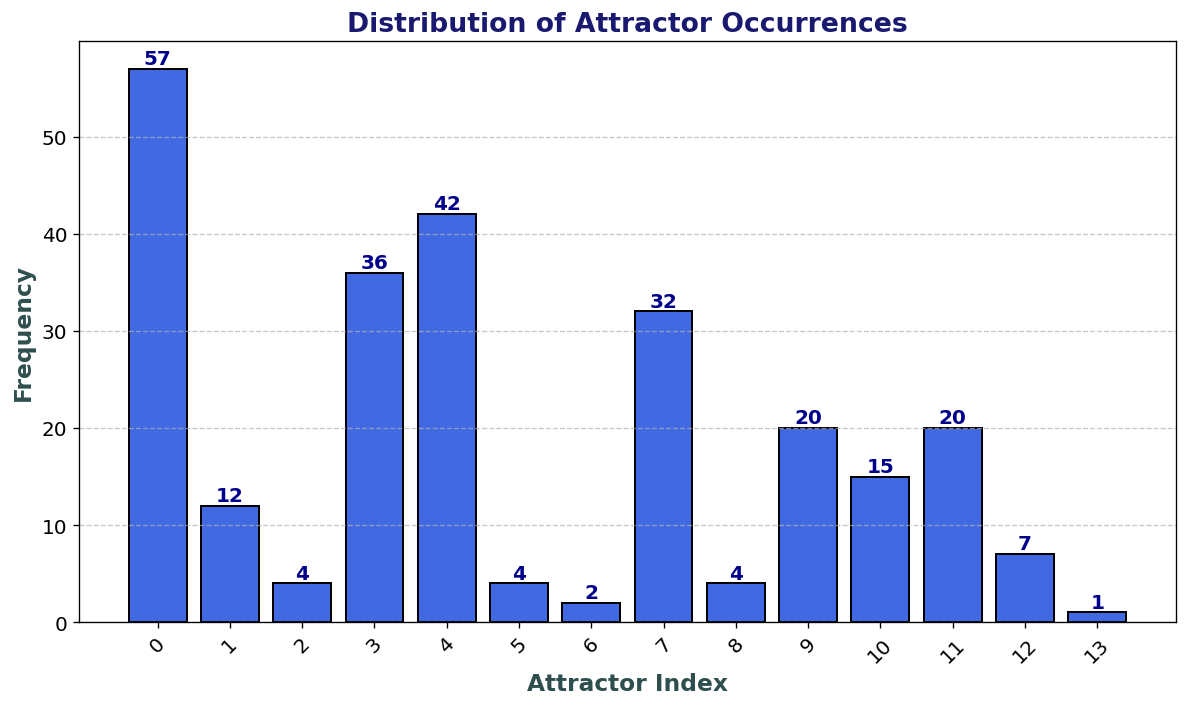

In [11]:
import matplotlib.pyplot as plt

# Extract attractor indices and their occurrences
attractor_indices = range(len(attractor_counts))
attractor_frequencies = list(attractor_counts.values())

# Create a larger figure with high resolution
plt.figure(figsize=(10, 6), dpi=120)

# Use a gradient color scheme for bars
bars = plt.bar(attractor_indices, attractor_frequencies, color="royalblue", edgecolor="black", linewidth=1.2)

# Add grid lines for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add labels and title with better styling
plt.xlabel("Attractor Index", fontsize=14, fontweight="bold", color="darkslategray")
plt.ylabel("Frequency", fontsize=14, fontweight="bold", color="darkslategray")
plt.title("Distribution of Attractor Occurrences", fontsize=16, fontweight="bold", color="midnightblue")

# Rotate x-axis labels for better readability (if many attractors)
plt.xticks(attractor_indices, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{int(yval)}", ha='center', fontsize=12, fontweight="bold", color="darkblue")

# Enhance layout and show the graph
plt.tight_layout()
plt.show()


###### Optimize Stored Patterns:  Reduce interference by limiting the number of stored patterns to ~13.8% of the neurons ---> 



# 3.2. Sequential Update

#### 3.2.1. Load pict.dat, which contains nine 1024-dimensional images and Extract Patterns

In [12]:
# Load data
data = np.genfromtxt('./pict.dat', dtype=None, delimiter=',', encoding=None)

# Reshape data into 1024-dimensional patterns
patterns = np.array(data).reshape(-1, 1024)

# Assign patterns to variables
p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11 = patterns[:11]


#### 3.2.2. Convert each pattern into a 32×32 image and visualize it.

##### - Converts each 1024-dimensional vector into a 32×32 grid.
##### - Displays multiple patterns side by side for better comparison.

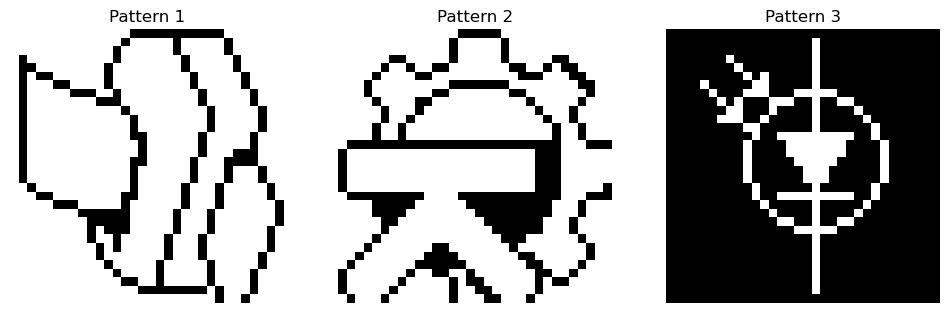

In [13]:
import matplotlib.pyplot as plt

def display_patterns(pattern_list, titles):
    fig, axes = plt.subplots(1, len(pattern_list), figsize=(12, 4))
    for ax, pattern, title in zip(axes, pattern_list, titles):
        ax.imshow(pattern.reshape(32, 32), cmap="gray_r")
        ax.set_title(title)
        ax.axis("off")  # Remove gridlines
    plt.show()

# Display original training patterns
display_patterns([p1, p2, p3], ["Pattern 1", "Pattern 2", "Pattern 3"])


#### 3.2.3. Train the Hopfield network on the first three patterns.

##### - Trains the network using p1, p2, and p3.
##### - Ensures the network can store these patterns correctly.

In [14]:
# Train the Hopfield network
training_patterns = np.array([p1, p2, p3])
network = HopfieldNetwork(max_iterations=8, prediction_method="sequential")
network.fit(training_patterns, training_patterns)
print("✅ Hopfield network trained on first three patterns.")


✅ Hopfield network trained on first three patterns.


#### 3.2.4. Check that the three patterns are stable????

##### - Tests whether p1, p2, and p3 remain unchanged after retrieval.

In [15]:

# Check pattern stability
results = network.predict(training_patterns)

print("\n🔍 Checking Pattern Stability...")
for i, (original, updated) in enumerate(zip(training_patterns, results)):
    num_differences = np.sum(original != updated)
    energy_before = _get_energy(network.weights, original)
    energy_after = _get_energy(network.weights, updated)
    
    print(f"\nPattern {i+1}:")
    print(f"✅ Stable: {num_differences == 0}")
    print(f"🔢 Differences: {num_differences} bits changed")
    print(f"⚡ Energy Before: {energy_before:.4f}, After: {energy_after:.4f}")

    # Print a small portion of the pattern for readability
    print("Original pattern snippet:", original[:20])
    print("Updated pattern snippet: ", updated[:20])



🔍 Checking Pattern Stability...

Pattern 1:
✅ Stable: True
🔢 Differences: 0 bits changed
⚡ Energy Before: -1439.3906, After: -1439.3906
Original pattern snippet: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1]
Updated pattern snippet:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1]

Pattern 2:
✅ Stable: True
🔢 Differences: 0 bits changed
⚡ Energy Before: -1365.6406, After: -1365.6406
Original pattern snippet: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1]
Updated pattern snippet:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1]

Pattern 3:
✅ Stable: True
🔢 Differences: 0 bits changed
⚡ Energy Before: -1462.2500, After: -1462.2500
Original pattern snippet: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Updated pattern snippet:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


#### 3.2.5. Can the network complete a degraded pattern? Try the pattern p10, which is a degraded version of p1, or p11 which is a mixture of p2 and p3

##### - The function compares degraded patterns to their expected stored versions.
##### - Displays images of the original, degraded, and recovered patterns.
##### - Counts how many bits were restored.
##### - Tests both p10 (damaged p1) and p11 (mixture of p2 & p3).


🔍 Testing recovery for p10 (degraded p1):
🛠 Original Differences: 241 bits
✅ After Recovery: 0 bits different
📈 Recovery Rate: 100.00%
⚡ Energy Before: -415.9805, After: -1439.3906
Original snippet: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1]
Degraded snippet: [-1 -1  1  1 -1  1  1 -1  1  1 -1  1 -1  1 -1  1  1  1 -1 -1]
Recovered snippet: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1]


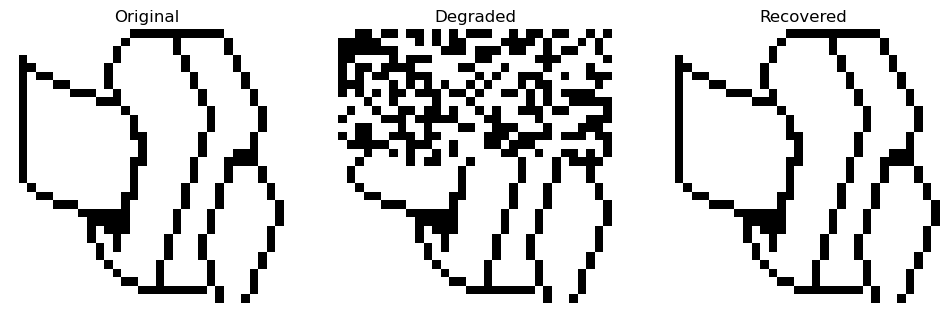


🔍 Testing recovery for p11 (mixture of p2 & p3):
🛠 Original Differences: 360 bits
✅ After Recovery: 728 bits different
📈 Recovery Rate: -102.22%
⚡ Energy Before: -173.5000, After: -1462.2500
Original snippet: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1]
Degraded snippet: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Recovered snippet: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


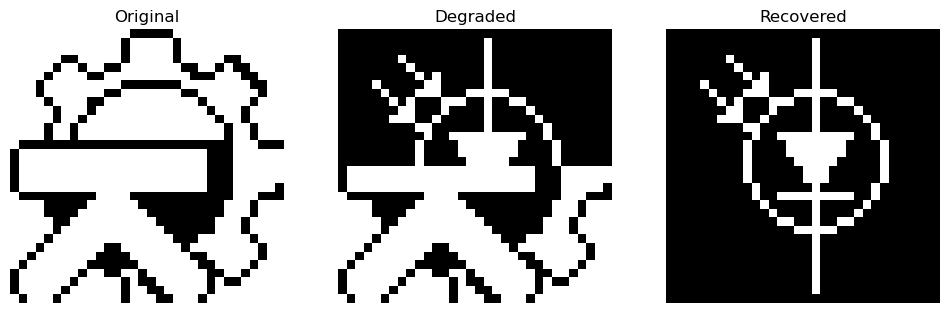

In [16]:


def compare_pattern_recovery(degraded, original, label):
    recovered = network.predict(degraded.reshape((1, 1024)))[0]
    
    num_differences_before = np.sum(degraded != original)
    num_differences_after = np.sum(recovered != original)
    recovery_rate = 100 * (num_differences_before - num_differences_after) / num_differences_before
    
    energy_before = _get_energy(network.weights, degraded)
    energy_after = _get_energy(network.weights, recovered)
    
    print(f"\n🔍 Testing recovery for {label}:")
    print(f"🛠 Original Differences: {num_differences_before} bits")
    print(f"✅ After Recovery: {num_differences_after} bits different")
    print(f"📈 Recovery Rate: {recovery_rate:.2f}%")
    print(f"⚡ Energy Before: {energy_before:.4f}, After: {energy_after:.4f}")

    print("Original snippet:", original[:20])
    print("Degraded snippet:", degraded[:20])
    print("Recovered snippet:", recovered[:20])

    display_patterns([original, degraded, recovered], ["Original", "Degraded", "Recovered"])

# Test recovery of p10 (should match p1)
compare_pattern_recovery(p10, p1, "p10 (degraded p1)")

# Test recovery of p11 (should match p2 or p3)
compare_pattern_recovery(p11, p2, "p11 (mixture of p2 & p3)")



#### 3.2.6. Clearly convergence is practically instantaneous. What happens if we select units randomly? Please calculate their new state and then repeat the process in the spirit of the original sequential Hopfield dynamics. Please demonstrate the image every hundredth iteration or so.


🔍 Running Sequential Update on Degraded Pattern (Displaying every 200 iterations)...

Iteration 0:
🔢 Bits Changed: 241
⚡ Energy: -1439.3906


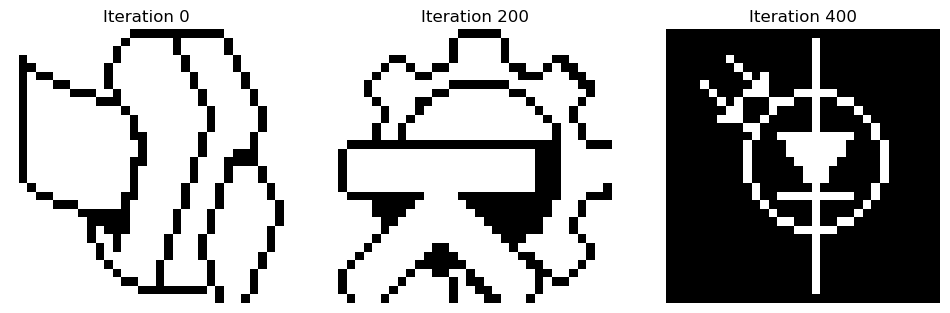


Iteration 200:
🔢 Bits Changed: 0
⚡ Energy: -1439.3906


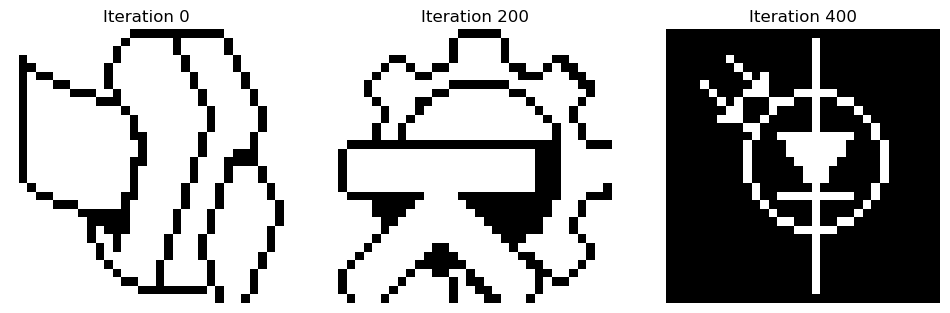


Iteration 400:
🔢 Bits Changed: 0
⚡ Energy: -1439.3906


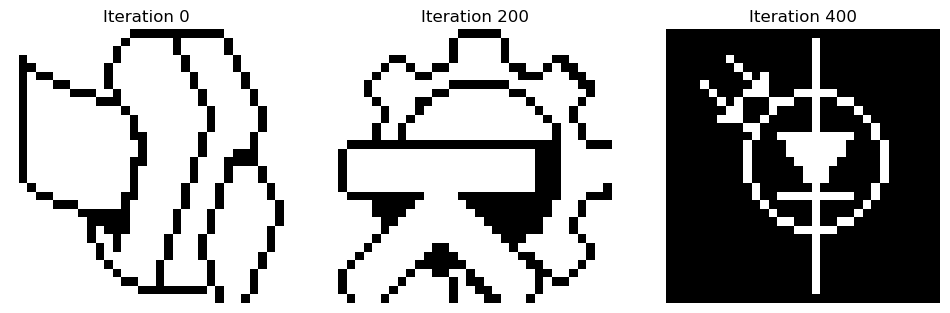


Iteration 600:
🔢 Bits Changed: 0
⚡ Energy: -1439.3906


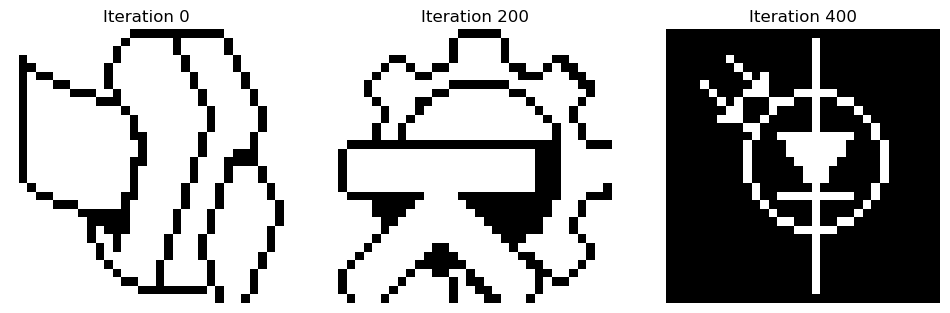


Iteration 800:
🔢 Bits Changed: 0
⚡ Energy: -1439.3906


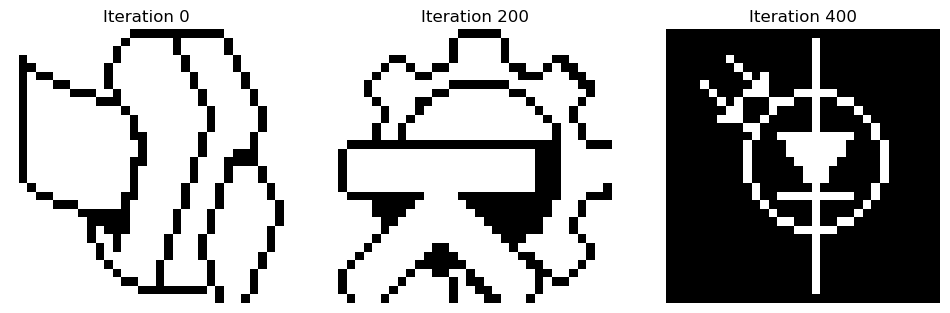

In [17]:

def visualize_sequential_update(pattern, iterations=1000, step=100):
    """
    Runs a Hopfield update with sequential random selection and prints numerical updates.
    """
    network = HopfieldNetwork(max_iterations=iterations, prediction_method="sequential")
    network.fit(training_patterns, training_patterns)

    print(f"\n🔍 Running Sequential Update on Degraded Pattern (Displaying every {step} iterations)...")

    previous_pattern = pattern.copy()
    for i in range(0, iterations, step):
        updated_pattern = network.predict(previous_pattern.reshape((1, 1024)))[0]
        
        num_differences = np.sum(previous_pattern != updated_pattern)
        energy = _get_energy(network.weights, updated_pattern)
        
        print(f"\nIteration {i}:")
        print(f"🔢 Bits Changed: {num_differences}")
        print(f"⚡ Energy: {energy:.4f}")

        previous_pattern = updated_pattern.copy()
        display_patterns(results, [f"Iteration {i}" for i in range(0, iterations, step)])

# Test sequential updates with detailed logs on p10
visualize_sequential_update(p10, iterations=1000, step=200)


# 3.3. Energy

#### 3.3.1 What is the energy at the different attractors??

##### - Displays energy at every iteration to show stabilization.
##### - Helps verify whether each attractor reaches a minimum energy state.

In [18]:
fixed_points = np.array([p1, p2, p3, p4, p5, p6, p7, p8, p9])
network = HopfieldNetwork(max_iterations=8, prediction_method="sequential")
network.fit(training_patterns, training_patterns)

for i in range(len(fixed_points)):
    x = fixed_points[i].reshape((1, 1024))
    network.predict(x)
    energy = network.getEnergy()
    print("The energy at attractor p{} is {}.".format(i+1, energy[7][0][0]))


The energy at attractor p1 is -1439.390625.
The energy at attractor p2 is -1365.640625.
The energy at attractor p3 is -1462.25.
The energy at attractor p4 is -1596.01171875.
The energy at attractor p5 is -1596.01171875.
The energy at attractor p6 is -1596.01171875.
The energy at attractor p7 is -1596.01171875.
The energy at attractor p8 is -1596.01171875.
The energy at attractor p9 is -1596.01171875.


#### 3.3.2 What is the energy at the points of the distorted patterns??

##### - Helps compare distorted vs. stored patterns' energy levels.
##### - Indicates if the network can restore distorted patterns to a stable attractor.


In [19]:
testing_patterns = np.array([p10, p11])

for i in range(len(testing_patterns)):
    x = testing_patterns[i].reshape((1, 1024))
    network.predict(x)
    energy = network.getEnergy()
    print("The energy at distorted pattern p{} is {}.".format(i+10, energy[7][0][0]))


The energy at distorted pattern p10 is -1439.390625.
The energy at distorted pattern p11 is -1596.01171875.


#### 3.3.3. Follow how the energy changes from iteration to iteration when you use the sequential update rule to approach an attractor.

##### - Tracks how energy changes as the network updates neurons sequentially.


🔍 Energy Evolution for p11 (Sequential Update):
  Iteration 0: Energy = -1356.2500
  Iteration 1: Energy = -1462.2500
  Iteration 2: Energy = -1462.2500
  Iteration 3: Energy = -1462.2500
  Iteration 4: Energy = -1462.2500
  Iteration 5: Energy = -1462.2500
  Iteration 6: Energy = -1462.2500
  Iteration 7: Energy = -1462.2500


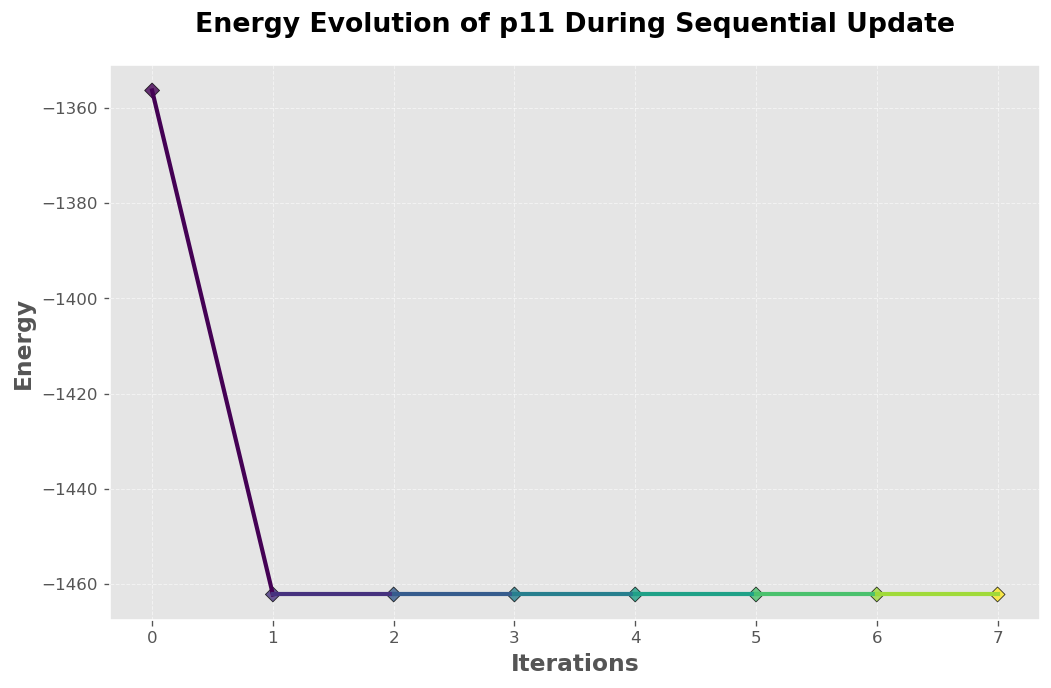

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Measure energy change during sequential updates
network.predict(p11.reshape((1,1024)))
energy_values = network.getEnergy()
energy_list = [float(e[0][0]) if isinstance(e, np.ndarray) else float(e) for e in energy_values]

iterations = len(energy_list)

# Print energy values
print("\n🔍 Energy Evolution for p11 (Sequential Update):")
for i, energy in enumerate(energy_list):
    print(f"  Iteration {i}: Energy = {energy:.4f}")

    
# Elegant plot styling
plt.figure(figsize=(10, 6), dpi=120)
plt.style.use("ggplot")  # Ensures compatibility and elegance

# Create color gradient effect
colors = plt.cm.viridis(np.linspace(0, 1, iterations))  

# Plot energy curve with gradient effect
for i in range(iterations - 1):
    plt.plot([i, i + 1], [energy_list[i], energy_list[i + 1]], 
             color=colors[i], linewidth=2.5)

# Add markers at every 10th iteration for clarity
plt.scatter(range(iterations), energy_list, c=colors, 
            s=40, edgecolors='black', marker='D', alpha=0.8)

# Labels and title with improved font styling
plt.xlabel("Iterations", fontsize=14, fontweight="bold")
plt.ylabel("Energy", fontsize=14, fontweight="bold")
plt.title("Energy Evolution of p11 During Sequential Update", fontsize=16, fontweight="bold", pad=20)

# Custom grid style
plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.5)

# Show the updated plot
plt.show()


#### 3.3.4. Generate a weight matrix by setting the weights to normally distributed random numbers, and try iterating an arbitrary starting state. What happens?

##### - Initializes a Hopfield network with randomly distributed weights.
##### - Observes how energy evolves when using arbitrary weights


🔍 Energy Evolution with Random Weights:
  Iteration 0: Energy = -11.0674
  Iteration 1: Energy = -14.3178
  Iteration 2: Energy = -14.6368
  Iteration 3: Energy = -15.8640
  Iteration 4: Energy = -15.5383
  Iteration 5: Energy = -15.3917
  Iteration 6: Energy = -14.8513
  Iteration 7: Energy = -15.9289
  Iteration 8: Energy = -15.4730
  Iteration 9: Energy = -15.9501
  Iteration 10: Energy = -15.2682
  Iteration 11: Energy = -14.3203
  Iteration 12: Energy = -15.1206
  Iteration 13: Energy = -15.7295
  Iteration 14: Energy = -16.4833
  Iteration 15: Energy = -16.5680
  Iteration 16: Energy = -15.4473
  Iteration 17: Energy = -15.5083
  Iteration 18: Energy = -14.7398
  Iteration 19: Energy = -14.5042
  Iteration 20: Energy = -15.7356
  Iteration 21: Energy = -14.8062
  Iteration 22: Energy = -14.3216
  Iteration 23: Energy = -14.4100
  Iteration 24: Energy = -15.6679
  Iteration 25: Energy = -15.1857
  Iteration 26: Energy = -16.8354
  Iteration 27: Energy = -15.0301
  Iteration 28: E

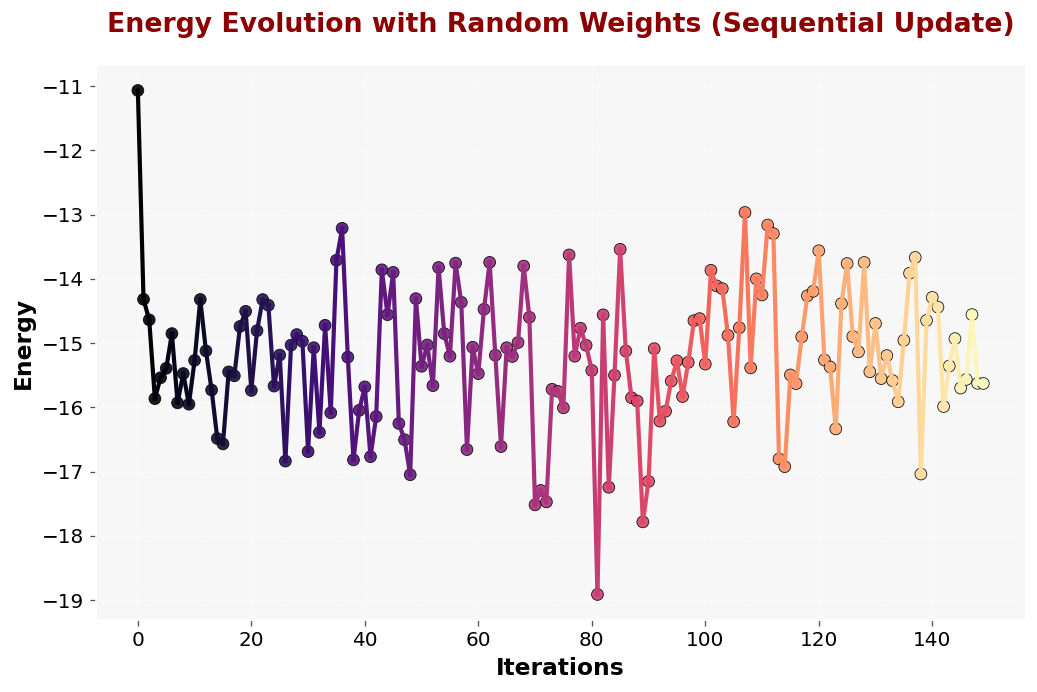

In [21]:

# Test random weights
network = HopfieldNetwork(max_iterations=150, prediction_method="sequential", random_weights=True)
network.fit(training_patterns, training_patterns)
network.predict(p11.reshape((1,1024)))
energy_values = network.getEnergy()
iterations = len(energy_values)

print("\n🔍 Energy Evolution with Random Weights:")
for i, energy in enumerate(energy_values):
    print(f"  Iteration {i}: Energy = {energy[0][0]:.4f}")

# Elegant plot styling
plt.figure(figsize=(10, 6), dpi=120)
plt.style.use("ggplot")  # Uses a clean, professional style

# Create a smooth color gradient effect
colors = plt.cm.magma(np.linspace(0, 1, iterations))  # 'magma' for a deep modern look

# Plot energy curve with gradient effect
for i in range(iterations - 1):
    plt.plot([i, i + 1], [energy_values[i][0][0], energy_values[i + 1][0][0]], 
             color=colors[i], linewidth=2.5)

# Add markers at every 10th iteration for better clarity
plt.scatter(range(iterations), [e[0][0] for e in energy_values], c=colors, 
            s=50, edgecolors='black', marker='o', alpha=0.9)

# Labels and title with improved font styling
plt.xlabel("Iterations", fontsize=14, fontweight="bold", color="black")
plt.ylabel("Energy", fontsize=14, fontweight="bold", color="black")
plt.title("Energy Evolution with Random Weights (Sequential Update)", fontsize=16, fontweight="bold", color="darkred", pad=20)

# Custom grid style
plt.grid(True, linestyle="--", linewidth=0.7, alpha=0.6)

# Darker background for better contrast
plt.gca().set_facecolor("#f7f7f7")  # Light gray background
plt.xticks(color="black", fontsize=12)
plt.yticks(color="black", fontsize=12)

# Show the updated plot
plt.show()


#### 3.3.5. Make the weight matrix symmetric (e.g. by setting w=0.5(w + w’)). What happens now? Why?

##### - Ensures the weight matrix is symmetric (w = 0.5 * (w + w.T)).
##### - Observes how energy evolves with symmetric weights.


🔍 Energy Evolution with Symmetric Weights:
  Iteration 0: Energy = -22.7068
  Iteration 1: Energy = -26.9741
  Iteration 2: Energy = -28.6804
  Iteration 3: Energy = -29.4907
  Iteration 4: Energy = -29.7445
  Iteration 5: Energy = -29.8240
  Iteration 6: Energy = -29.9422
  Iteration 7: Energy = -30.0098


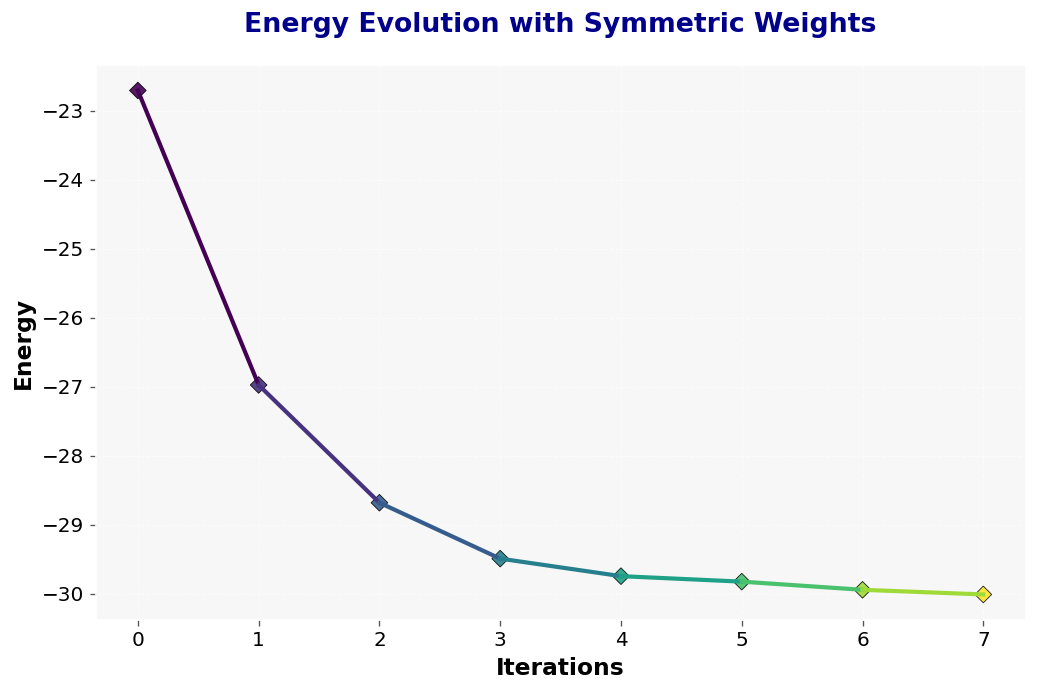

In [22]:
# Test symmetric weight matrix
network = HopfieldNetwork(max_iterations=8, prediction_method="sequential", random_weights=True, symmetric_weights=True)
network.fit(training_patterns, training_patterns)
network.predict(p1.reshape((1,1024)))
energy_values = network.getEnergy()
iterations = len(energy_values)

print("\n🔍 Energy Evolution with Symmetric Weights:")
for i, energy in enumerate(energy_values):
    print(f"  Iteration {i}: Energy = {energy[0][0]:.4f}")

# Create a larger and higher-quality figure
plt.figure(figsize=(10, 6), dpi=120)
plt.style.use("ggplot")  # Uses a clean and professional style

# Generate a gradient color effect
colors = plt.cm.viridis(np.linspace(0, 1, iterations))  # 'viridis' colormap for modern aesthetics

# Plot the energy curve with gradient effect
for i in range(iterations - 1):
    plt.plot([i, i + 1], [energy_values[i][0][0], energy_values[i + 1][0][0]], 
             color=colors[i], linewidth=2.5)

# Add diamond markers at key points
plt.scatter(range(iterations), [e[0][0] for e in energy_values], c=colors, 
            s=50, edgecolors='black', marker='D', alpha=0.9)

# Labels and title with improved font styling
plt.xlabel("Iterations", fontsize=14, fontweight="bold", color="black")
plt.ylabel("Energy", fontsize=14, fontweight="bold", color="black")
plt.title("Energy Evolution with Symmetric Weights", fontsize=16, fontweight="bold", color="darkblue", pad=20)

# Custom grid style
plt.grid(True, linestyle="--", linewidth=0.7, alpha=0.6)

# Set a light gray background for a more elegant look
plt.gca().set_facecolor("#f7f7f7")  
plt.xticks(color="black", fontsize=12)
plt.yticks(color="black", fontsize=12)

# Show the updated plot
plt.show()



# 3.4 Distortion Resistance

##### 3.4.0. Train the Hopfield network using p1, p2, and p3.

In [23]:
training_patterns = np.array([p1, p2, p3])
network = HopfieldNetwork(max_iterations=8)
network.fit(training_patterns, training_patterns)
print("✅ Hopfield Network successfully trained on patterns p1, p2, p3.")


✅ Hopfield Network successfully trained on patterns p1, p2, p3.


In [24]:
def noisy_pattern(pattern, noise_percentage):
    """
    Introduces a given percentage of noise (bit flips) into a pattern.
    """
    noisy = pattern.copy()
    num_flips = int(np.ceil(len(pattern) * noise_percentage / 100))
    flip_indices = np.random.choice(len(pattern), num_flips, replace=False)
    noisy[flip_indices] = -noisy[flip_indices]

    print(f"🔹 {noise_percentage}% Noise: {num_flips} bits flipped at indices {flip_indices[:10]}...")  # Show first 10 indices
    return noisy


#### 3.4.1. How much noise can be removed?

##### - Tracks the success rate of pattern recovery at different noise levels (0% - 100%).
##### - Shows how much noise can be removed before the network fails to restore patterns.

🔹 0% Noise: 0 bits flipped at indices []...
🔹 0% Noise: p1 Restored = True
🔹 0% Noise: 0 bits flipped at indices []...
🔹 0% Noise: p2 Restored = True
🔹 0% Noise: 0 bits flipped at indices []...
🔹 0% Noise: p3 Restored = True
🔹 10% Noise: 103 bits flipped at indices [ 433  630 1011  688  911  234  938  164 1022  781]...
🔹 10% Noise: p1 Restored = True
🔹 10% Noise: 103 bits flipped at indices [971 922 633 245  19 182 703 222  18 858]...
🔹 10% Noise: p2 Restored = True
🔹 10% Noise: 103 bits flipped at indices [647 394  89 573 420 862 485 635 449 291]...
🔹 10% Noise: p3 Restored = True
🔹 20% Noise: 205 bits flipped at indices [ 794  576  654  145 1012  336  900  329  816   94]...
🔹 20% Noise: p1 Restored = True
🔹 20% Noise: 205 bits flipped at indices [749 338 706 224 817 616 399 774 203 997]...
🔹 20% Noise: p2 Restored = True
🔹 20% Noise: 205 bits flipped at indices [478 921 570 179 611 251 601 780 262 783]...
🔹 20% Noise: p3 Restored = True
🔹 30% Noise: 308 bits flipped at indices [326 9

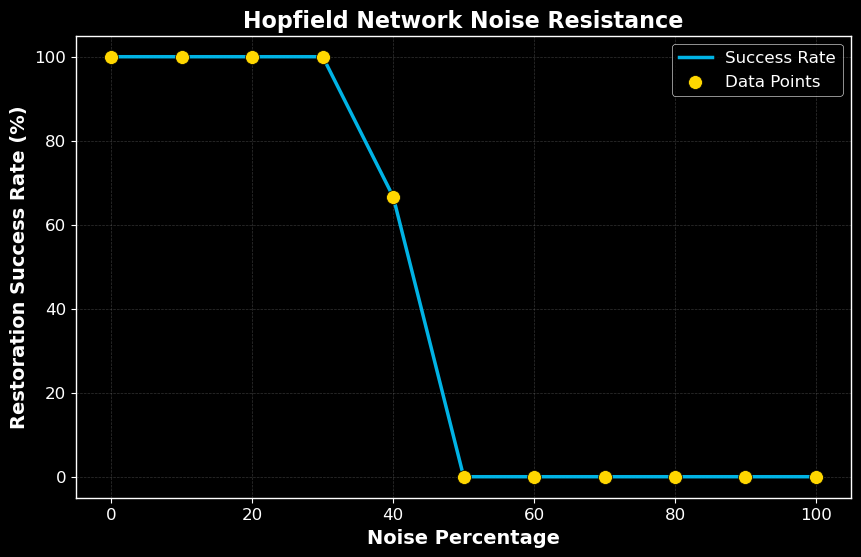

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (Replace with actual success rate data)
percentages = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
success_rates = []  # Use a list instead of a NumPy array

# Compute success rates
for p in percentages:
    correct_count = 0
    for pattern, label in zip([p1, p2, p3], ["p1", "p2", "p3"]):
        noisy_pattern_ = noisy_pattern(pattern, p)
        recovered_pattern = network.predict(noisy_pattern_)

        is_restored = np.array_equal(pattern, recovered_pattern)
        correct_count += is_restored
        print(f"🔹 {p}% Noise: {label} Restored = {is_restored}")

    success_rates.append(correct_count / 3 * 100)  # Convert to percentage

# Convert success rates to a NumPy array after the loop
success_rates = np.array(success_rates)

# Smooth the curve for a more elegant look
percentages_smooth = np.linspace(percentages.min(), percentages.max(), 300)
success_rates_smooth = np.interp(percentages_smooth, percentages, success_rates)

# Set dark background
plt.style.use("dark_background")

# Create the figure
plt.figure(figsize=(10, 6))

# Plot smooth curve with elegant styling
plt.plot(percentages_smooth, success_rates_smooth, color="#00c8ff", linewidth=2.5, linestyle="-", alpha=0.9, label="Success Rate")

# Add markers to original data points
plt.scatter(percentages, success_rates, color="gold", edgecolor="black", s=100, label="Data Points", zorder=3)

# Grid with transparency for elegance
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.4)

# Improve labels and title aesthetics
plt.xlabel("Noise Percentage", fontsize=14, color="white", fontweight="bold")
plt.ylabel("Restoration Success Rate (%)", fontsize=14, color="white", fontweight="bold")
plt.title("Hopfield Network Noise Resistance", fontsize=16, color="white", fontweight="bold")

# Customize ticks
plt.xticks(fontsize=12, color="white")
plt.yticks(fontsize=12, color="white")

# Add legend
plt.legend(fontsize=12, facecolor="black", edgecolor="white")

# Show the elegant plot
plt.show()


#### 3.4.2. Is there any difference between the three attractors with regard to noise tolerance?


##### - Separately tracks the noise tolerance of p1, p2, and p3.


🔹 0% Noise: 0 bits flipped at indices []...
🔹 0% Noise: 0 bits flipped at indices []...
🔹 0% Noise: 0 bits flipped at indices []...
🔹 0% Noise - p1 Restored: True, p2 Restored: True, p3 Restored: True
🔹 10% Noise: 103 bits flipped at indices [ 18 776 161 327  73 620 925 689 195 539]...
🔹 10% Noise: 103 bits flipped at indices [142 871 361 411 862 452 387 617 466 290]...
🔹 10% Noise: 103 bits flipped at indices [380 130 840 458 292 223 446 426 107 827]...
🔹 10% Noise - p1 Restored: True, p2 Restored: True, p3 Restored: True
🔹 20% Noise: 205 bits flipped at indices [784 107 126 627 150 749 719 845 561 766]...
🔹 20% Noise: 205 bits flipped at indices [ 52 794 991 879 980 674 110 463 691 628]...
🔹 20% Noise: 205 bits flipped at indices [1005  377  859  931  954  927  249  626  909  836]...
🔹 20% Noise - p1 Restored: True, p2 Restored: True, p3 Restored: True
🔹 30% Noise: 308 bits flipped at indices [869 576 797 863 939 284 328 866 349 180]...
🔹 30% Noise: 308 bits flipped at indices [601 8

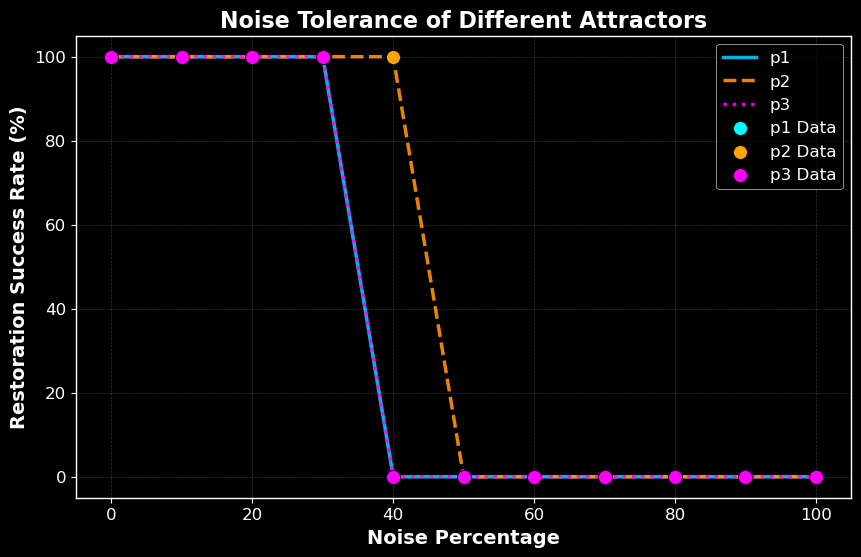

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Sample noise percentages
percentages = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Track noise tolerance separately for p1, p2, p3
success_rates_p1, success_rates_p2, success_rates_p3 = [], [], []

for p in percentages:
    noisy_p1 = noisy_pattern(p1, p)
    noisy_p2 = noisy_pattern(p2, p)
    noisy_p3 = noisy_pattern(p3, p)

    p1_restored = np.array_equal(p1, network.predict(noisy_p1))
    p2_restored = np.array_equal(p2, network.predict(noisy_p2))
    p3_restored = np.array_equal(p3, network.predict(noisy_p3))

    success_rates_p1.append(p1_restored * 100)
    success_rates_p2.append(p2_restored * 100)
    success_rates_p3.append(p3_restored * 100)

    print(f"🔹 {p}% Noise - p1 Restored: {p1_restored}, p2 Restored: {p2_restored}, p3 Restored: {p3_restored}")

# Convert lists to NumPy arrays
success_rates_p1 = np.array(success_rates_p1)
success_rates_p2 = np.array(success_rates_p2)
success_rates_p3 = np.array(success_rates_p3)

# Create smooth interpolation for curves
percentages_smooth = np.linspace(percentages.min(), percentages.max(), 300)
success_rates_p1_smooth = np.interp(percentages_smooth, percentages, success_rates_p1)
success_rates_p2_smooth = np.interp(percentages_smooth, percentages, success_rates_p2)
success_rates_p3_smooth = np.interp(percentages_smooth, percentages, success_rates_p3)

# Set dark background
plt.style.use("dark_background")

# Create the figure
plt.figure(figsize=(10, 6))

# Plot smooth curves with stylish colors
plt.plot(percentages_smooth, success_rates_p1_smooth, color="#00c8ff", linewidth=2.5, linestyle="-", alpha=0.9, label="p1")
plt.plot(percentages_smooth, success_rates_p2_smooth, color="#ff9500", linewidth=2.5, linestyle="--", alpha=0.9, label="p2")
plt.plot(percentages_smooth, success_rates_p3_smooth, color="#ff00ff", linewidth=2.5, linestyle=":", alpha=0.9, label="p3")

# Add elegant markers at actual data points
plt.scatter(percentages, success_rates_p1, color="cyan", edgecolor="black", s=100, label="p1 Data", zorder=3)
plt.scatter(percentages, success_rates_p2, color="orange", edgecolor="black", s=100, label="p2 Data", zorder=3)
plt.scatter(percentages, success_rates_p3, color="magenta", edgecolor="black", s=100, label="p3 Data", zorder=3)

# Grid with transparency for elegance
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.4)

# Improve labels and title aesthetics
plt.xlabel("Noise Percentage", fontsize=14, color="white", fontweight="bold")
plt.ylabel("Restoration Success Rate (%)", fontsize=14, color="white", fontweight="bold")
plt.title("Noise Tolerance of Different Attractors", fontsize=16, color="white", fontweight="bold")

# Customize ticks
plt.xticks(fontsize=12, color="white")
plt.yticks(fontsize=12, color="white")

# Add stylish legend
plt.legend(fontsize=12, facecolor="black", edgecolor="white")

# Show the elegant plot
plt.show()


#### 3.4.3. Does the network always converge to the right attractor?

##### - Tracks whether patterns converge to the correct attractor.
##### -Checks if a pattern mistakenly converges to the wrong attractor.
##### - Results for each noise level, confirming behavior.

In [27]:
# Track convergence of noisy patterns
for p in percentages:
    noisy_p1 = noisy_pattern(p1, p)
    recovered_p1 = network.predict(noisy_p1)

    noisy_p2 = noisy_pattern(p2, p)
    recovered_p2 = network.predict(noisy_p2)

    noisy_p3 = noisy_pattern(p3, p)
    recovered_p3 = network.predict(noisy_p3)

    p1_match = np.array_equal(recovered_p1, p1)
    p2_match = np.array_equal(recovered_p2, p2)
    p3_match = np.array_equal(recovered_p3, p3)

    wrong_attractor_p1 = not p1_match and (np.array_equal(recovered_p1, p2) or np.array_equal(recovered_p1, p3))
    wrong_attractor_p2 = not p2_match and (np.array_equal(recovered_p2, p1) or np.array_equal(recovered_p2, p3))
    wrong_attractor_p3 = not p3_match and (np.array_equal(recovered_p3, p1) or np.array_equal(recovered_p3, p2))

    print(f"🔹 {p}% Noise:")
    print(f"  p1: Correct = {p1_match}, Wrong Attractor = {wrong_attractor_p1}")
    print(f"  p2: Correct = {p2_match}, Wrong Attractor = {wrong_attractor_p2}")
    print(f"  p3: Correct = {p3_match}, Wrong Attractor = {wrong_attractor_p3}")


🔹 0% Noise: 0 bits flipped at indices []...
🔹 0% Noise: 0 bits flipped at indices []...
🔹 0% Noise: 0 bits flipped at indices []...
🔹 0% Noise:
  p1: Correct = True, Wrong Attractor = False
  p2: Correct = True, Wrong Attractor = False
  p3: Correct = True, Wrong Attractor = False
🔹 10% Noise: 103 bits flipped at indices [457 185 799 873 526   8 237 627 154 147]...
🔹 10% Noise: 103 bits flipped at indices [669 822 129 808 475 884 200 530 231 111]...
🔹 10% Noise: 103 bits flipped at indices [ 166  580 1016  914   18    7  790   68  118  422]...
🔹 10% Noise:
  p1: Correct = True, Wrong Attractor = False
  p2: Correct = True, Wrong Attractor = False
  p3: Correct = True, Wrong Attractor = False
🔹 20% Noise: 205 bits flipped at indices [556  53 778 993   5 717 649 476 924 514]...
🔹 20% Noise: 205 bits flipped at indices [996 540 186 556 711 434 669  22 233 810]...
🔹 20% Noise: 205 bits flipped at indices [ 294  113  479  662 1021  257  563  945  860   57]...
🔹 20% Noise:
  p1: Correct = Tr

#### 3.4.4. Do the extra iterations (beyond a single-step recall) help? Do you notice any other attractors?


##### - Tracks energy minimization over multiple iterations.
##### - Shows whether extra iterations improve pattern recall.
##### - Energy reduction, confirming convergence behavior.


🔍 Energy Evolution for p11 (Multiple Iterations):
  Iteration 0: Energy = -1178.0117
  Iteration 1: Energy = -1596.0117
  Iteration 2: Energy = -1596.0117
  Iteration 3: Energy = -1596.0117
  Iteration 4: Energy = -1596.0117
  Iteration 5: Energy = -1596.0117
  Iteration 6: Energy = -1596.0117
  Iteration 7: Energy = -1596.0117


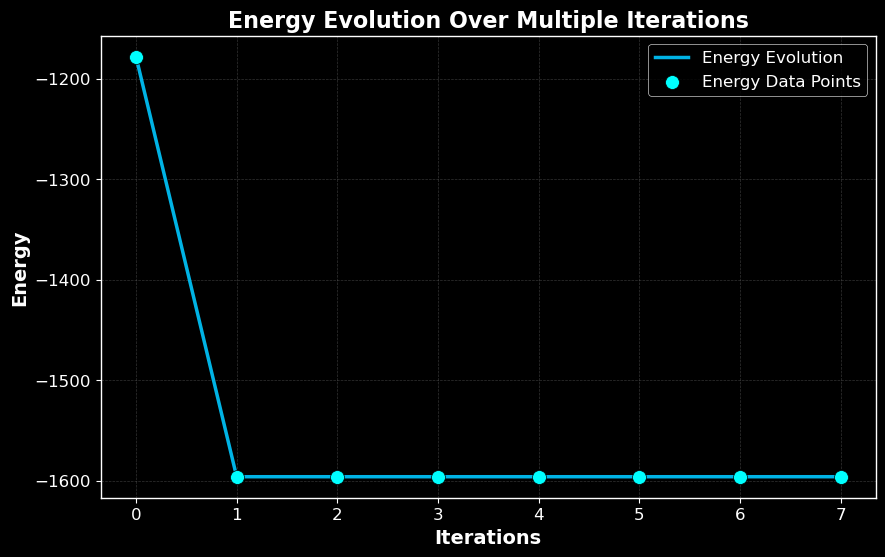

In [28]:
import matplotlib.pyplot as plt

# Measure energy evolution for multiple iterations
network.predict(p11.reshape((1, 1024)))
energy_values = network.getEnergy()
iterations = len(energy_values)

# Print energy values per iteration
print("\n🔍 Energy Evolution for p11 (Multiple Iterations):")
for i, energy in enumerate(energy_values):
    print(f"  Iteration {i}: Energy = {energy[0][0]:.4f}")

# Set dark background for the plot
plt.style.use("dark_background")

# Create the figure
plt.figure(figsize=(10, 6))

# Plot smooth curves with stylish colors
plt.plot(range(iterations), [e[0][0] for e in energy_values], color="#00c8ff", linewidth=2.5, linestyle="-", alpha=0.9, label="Energy Evolution")

# Add elegant markers at actual data points
plt.scatter(range(iterations), [e[0][0] for e in energy_values], color="cyan", edgecolor="black", s=100, label="Energy Data Points", zorder=3)

# Grid with transparency for elegance
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.4)

# Improve labels and title aesthetics
plt.xlabel("Iterations", fontsize=14, color="white", fontweight="bold")
plt.ylabel("Energy", fontsize=14, color="white", fontweight="bold")
plt.title("Energy Evolution Over Multiple Iterations", fontsize=16, color="white", fontweight="bold")

# Customize ticks
plt.xticks(fontsize=12, color="white")
plt.yticks(fontsize=12, color="white")

# Add stylish legend
plt.legend(fontsize=12, facecolor="black", edgecolor="white")

# Show the elegant plot
plt.show()


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Function to check convergence (ensures no infinite looping)
def has_converged(previous, current):
    return np.array_equal(previous, current)

# Define training patterns (adjust size if needed)
training_patterns = np.array([
    [-1, -1,  1, -1,  1, -1, -1,  1],  
    [-1, -1, -1, -1, -1,  1, -1, -1],  
    [-1,  1,  1, -1, -1,  1, -1,  1]
])

# Generate a **subset** of possible patterns to prevent excessive computation
num_test_patterns = 500  # Limit to avoid memory overload
test_patterns = np.random.choice([-1, 1], size=(num_test_patterns, 8))  # Use 8-bit size for efficiency

# Train the Hopfield network
network.fit(training_patterns, training_patterns)

# **Run iterative updates until convergence**
max_iterations = 50  # Prevent infinite loops
results = test_patterns.copy()

for iteration in range(max_iterations):
    new_results = network.predict(results)
    
    if has_converged(results, new_results):
        print(f"✅ Converged after {iteration+1} iterations.")
        break

    results = new_results  # Update for next iteration

# **Identify attractors**
attractors = np.unique(results, axis=0)
num_attractors = len(attractors)
print(f"🔹 Number of Attractors Found: {num_attractors}")

# Count occurrences of each attractor
occurrences = np.array([(results == attractors[i]).all(axis=1).sum() for i in range(num_attractors)])




✅ Converged after 2 iterations.
🔹 Number of Attractors Found: 14


# 3.5 Capacity

#### 3.5.1 How many patterns could safely be stored? Was the drop in performance gradual or abrupt?
#### - What Does This Code Do?
###### - Trains the Hopfield Network with `p1, p2, p3, p4`.
###### - Tests whether noisy versions of `p3` converge back to a known pattern.
###### - Tracks the percentage of cases where the correct pattern is retrieved.
###### - Prints the results for each noise level to analyze performance.

#### - Why Is This Code Beneficial?
###### - Determines the Hopfield Network’s storage limit by tracking performance as patterns are added.
###### - Identifies whether performance drops gradually or abruptly as more patterns are added.

#### - Why Was This Code Included?
###### - To analyze how many patterns can be safely stored before recall becomes unreliable.
###### - To determine if adding more patterns causes interference with previously stored ones.



🔍 Testing noise tolerance with increasing number of stored patterns:

Testing noise tolerance for p1:
0% noise → Accuracy: 83.40%
10% noise → Accuracy: 83.40%
20% noise → Accuracy: 83.40%
30% noise → Accuracy: 83.40%
40% noise → Accuracy: 83.40%
50% noise → Accuracy: 17.29%
60% noise → Accuracy: 16.60%
70% noise → Accuracy: 16.60%
80% noise → Accuracy: 16.60%
90% noise → Accuracy: 16.60%
100% noise → Accuracy: 16.60%

Testing noise tolerance for p2:
0% noise → Accuracy: 76.46%
10% noise → Accuracy: 76.46%
20% noise → Accuracy: 76.46%
30% noise → Accuracy: 76.46%
40% noise → Accuracy: 76.46%
50% noise → Accuracy: 23.73%
60% noise → Accuracy: 23.54%
70% noise → Accuracy: 23.54%
80% noise → Accuracy: 23.54%
90% noise → Accuracy: 23.54%
100% noise → Accuracy: 23.54%

Testing noise tolerance for p3:
0% noise → Accuracy: 89.16%
10% noise → Accuracy: 89.16%
20% noise → Accuracy: 89.16%
30% noise → Accuracy: 89.16%
40% noise → Accuracy: 89.16%
50% noise → Accuracy: 11.52%
60% noise → Accuracy

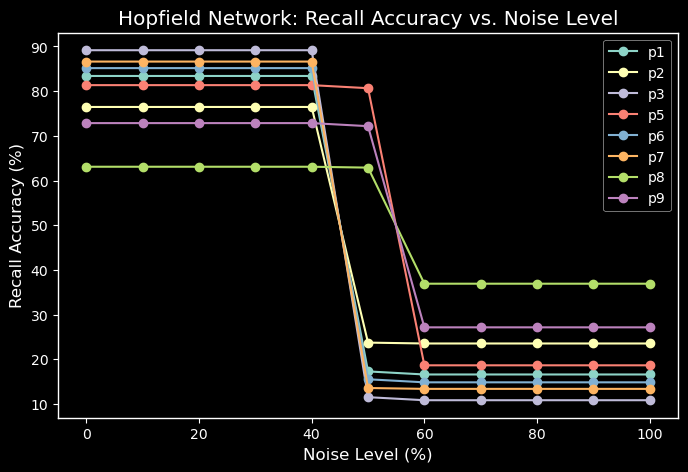

In [53]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Define training patterns
training_patterns = np.array([p1, p2, p3,  p5, p6, p7, p8, p9 ])
pattern_labels = ["p1", "p2", "p3", "p5", "p6", "p7", "p8", "p9" ]  # Labels for the graph

network = HopfieldNetwork(max_iterations=150)
network.fit(training_patterns, training_patterns)

print("\n🔍 Testing noise tolerance with increasing number of stored patterns:")

# Store results for each pattern
noise_percentages = np.arange(0, 101, 10)  # Noise levels from 0% to 100%
pattern_accuracies = {label: [] for label in pattern_labels}  # Store accuracy for each pattern

for idx, pattern in enumerate(training_patterns):
    label = pattern_labels[idx]
    print(f"\nTesting noise tolerance for {label}:")

    for noise_level in noise_percentages:
        noisy_p = noisy_pattern(pattern, noise_level)  # Add noise
        p_result = network.predict(noisy_p)  # Reconstruct pattern

        # Compute accuracy (percentage of bits that match)
        correct_bits = np.sum(pattern == p_result)
        total_bits = pattern.size
        accuracy = (correct_bits / total_bits) * 100

        # Store results
        pattern_accuracies[label].append(accuracy)

        print(f"{noise_level}% noise → Accuracy: {accuracy:.2f}%")

# Plot accuracy vs. noise level for all patterns
plt.figure(figsize=(8, 5))
for label in pattern_labels:
    plt.plot(noise_percentages, pattern_accuracies[label], marker='o', linestyle='-', label=f"{label}")

plt.xlabel("Noise Level (%)")
plt.ylabel("Recall Accuracy (%)")
plt.title("Hopfield Network: Recall Accuracy vs. Noise Level")
plt.legend()
plt.grid()
plt.show()


### adding only 3 patterns good results as the recall accuracy starts from 100% and then at noise level 40-50% the accuracy level starts to drop drastically which shows normal effect of noise level only
### adding 4 patterns start to show the changes of recall accuracy as none of the patterns could have a recall accuracy of 100% which starts to show the effect of patterns stored on the performance 
### By adding more patterns (5, 6) the results are just worse as more patterns were learned in the model 
### something interested was discovered is that p3 had the highest accuracy  

#### 3.5.2. Try to repeat this with learning a few random patterns instead of the pictures and see if you can store more.
#### 3.5.3. It has been shown that the capacity of a Hopfield network is around 0.138N. How do you explain the difference between random patterns and the pictures?



🔍 Testing capacity with 7 random patterns:

Testing pattern P1:
  0% noise → 100.0% accuracy
 10% noise → 100.0% accuracy
 20% noise → 100.0% accuracy
 30% noise → 100.0% accuracy
 40% noise → 100.0% accuracy
 50% noise →  44.9% accuracy
 60% noise →   0.0% accuracy
 70% noise →   0.0% accuracy
 80% noise →   0.0% accuracy
 90% noise →   0.0% accuracy
100% noise →   0.0% accuracy

Testing pattern P2:
  0% noise → 100.0% accuracy
 10% noise → 100.0% accuracy
 20% noise → 100.0% accuracy
 30% noise → 100.0% accuracy
 40% noise → 100.0% accuracy
 50% noise →  51.7% accuracy
 60% noise →   0.0% accuracy
 70% noise →   0.0% accuracy
 80% noise →   0.0% accuracy
 90% noise →   0.0% accuracy
100% noise →   0.0% accuracy

Testing pattern P3:
  0% noise → 100.0% accuracy
 10% noise → 100.0% accuracy
 20% noise → 100.0% accuracy
 30% noise → 100.0% accuracy
 40% noise → 100.0% accuracy
 50% noise →  50.0% accuracy
 60% noise →   0.0% accuracy
 70% noise →   0.0% accuracy
 80% noise →   0.0% acc

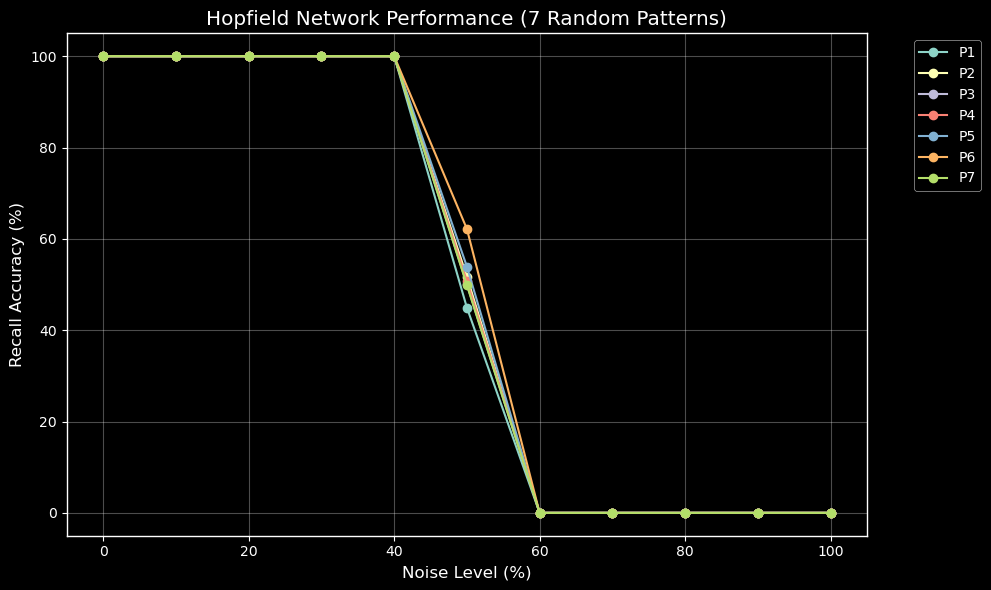

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from source.Hopfield import HopfieldNetwork, _predict_batch, _predict_sequential, _get_energy
def generate_random_pattern(shape, sparsity=0.5):
    """Generate random bipolar pattern with specified sparsity"""
    return np.random.choice([-1, 1], size=shape, p=[sparsity, 1-sparsity])

def add_noise(pattern, noise_percent):
    """Add random noise to a pattern"""
    noisy_pattern = pattern.copy()
    flip_mask = np.random.rand(*pattern.shape) < noise_percent/100
    noisy_pattern[flip_mask] *= -1
    return noisy_pattern

# Configuration parameters
num_patterns = 7         # Number of random patterns to store
pattern_shape = (50, 50)  # Shape of each pattern
pattern_size = np.prod(pattern_shape)

# Generate random training patterns
np.random.seed(42)  # For reproducibility
training_patterns = np.array([generate_random_pattern(pattern_size) 
                            for _ in range(num_patterns)])
pattern_labels = [f"P{i+1}" for i in range(num_patterns)]

# Create and train Hopfield network
network = HopfieldNetwork(max_iterations=150)
network.fit(training_patterns, training_patterns)

print(f"\n🔍 Testing capacity with {num_patterns} random patterns:")

# Test noise tolerance across different noise levels
noise_levels = np.arange(0, 101, 10)
results = {label: [] for label in pattern_labels}

for pattern_idx, (pattern, label) in enumerate(zip(training_patterns, pattern_labels)):
    print(f"\nTesting pattern {label}:")
    
    for noise in noise_levels:
        noisy = add_noise(pattern, noise)
        reconstructed = network.predict(noisy)
        accuracy = np.mean(pattern == reconstructed) * 100
        results[label].append(accuracy)
        print(f"{noise:3}% noise → {accuracy:5.1f}% accuracy")

# Visualize results
plt.figure(figsize=(10, 6))
for label in pattern_labels:
    plt.plot(noise_levels, results[label], marker='o', linestyle='-', label=label)

plt.title(f"Hopfield Network Performance ({num_patterns} Random Patterns)")
plt.xlabel("Noise Level (%)")
plt.ylabel("Recall Accuracy (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##### random with small pattern shape wpuld directly affect the graph by starting at 100% but the recall accuracy decreases in a high variance
#### random with large pattern shape would increase the perfromance where it starts from 100% recall and decreasing steeply converging to zero 

Testing random patterns...
P= 1, Accuracy=100.0%
P= 2, Accuracy=100.0%
P= 3, Accuracy=100.0%
P= 4, Accuracy=100.0%
P= 5, Accuracy=100.0%
P= 6, Accuracy=100.0%
P= 7, Accuracy=100.0%
P= 8, Accuracy=100.0%
P= 9, Accuracy=100.0%
P=10, Accuracy=96.0%
P=11, Accuracy=92.7%
P=12, Accuracy=90.0%
P=13, Accuracy=83.1%
P=14, Accuracy=78.6%
P=15, Accuracy=69.3%
P=16, Accuracy=77.5%
P=17, Accuracy=55.3%
P=18, Accuracy=44.4%
P=19, Accuracy=34.7%
P=20, Accuracy=39.0%

Testing structured patterns...
P= 1, Accuracy=100.0%
P= 2, Accuracy=100.0%
P= 3, Accuracy=0.0%
P= 4, Accuracy=10.0%
P= 5, Accuracy=0.0%
P= 6, Accuracy=0.0%
P= 7, Accuracy=0.0%
P= 8, Accuracy=0.0%
P= 9, Accuracy=0.0%
P=10, Accuracy=0.0%
P=11, Accuracy=0.0%
P=12, Accuracy=0.0%
P=13, Accuracy=0.0%
P=14, Accuracy=0.0%
P=15, Accuracy=0.0%
P=16, Accuracy=0.0%
P=17, Accuracy=0.0%
P=18, Accuracy=0.0%
P=19, Accuracy=0.0%
P=20, Accuracy=0.0%


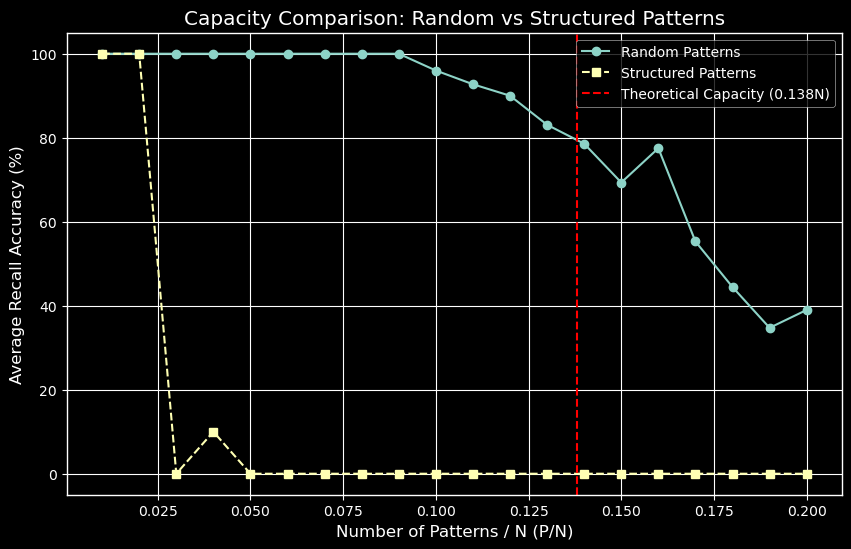

In [32]:
import numpy as np
import matplotlib.pyplot as plt

class HopfieldNetwork:
    def __init__(self, max_iterations=100):
        self.max_iterations = max_iterations
        self.weights = None

    def fit(self, patterns):
        n_samples, n_features = patterns.shape
        self.weights = np.zeros((n_features, n_features))
        for pattern in patterns:
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)  # Remove self-connections
        self.weights /= n_samples  # Normalize by number of patterns

    def predict(self, pattern):
        pattern = pattern.copy()
        for _ in range(self.max_iterations):
            prev_pattern = pattern.copy()
            # Update neurons asynchronously in random order
            for idx in np.random.permutation(len(pattern)):
                activation = np.dot(self.weights[idx], pattern)
                pattern[idx] = 1 if activation >= 0 else -1
            if np.array_equal(pattern, prev_pattern):
                break
        return pattern

def generate_random_pattern(size):
    return np.random.choice([-1, 1], size=size)

def generate_structured_pattern(size, grid_side=10, block_size=3):
    grid = np.full((grid_side, grid_side), -1, dtype=int)
    start_row = np.random.randint(0, grid_side - block_size + 1)
    start_col = np.random.randint(0, grid_side - block_size + 1)
    grid[start_row:start_row+block_size, start_col:start_col+block_size] = 1
    return grid.flatten()

def add_noise(pattern, noise_percent):
    noisy = pattern.copy()
    flip_mask = np.random.rand(len(noisy)) < noise_percent / 100
    noisy[flip_mask] *= -1
    return noisy

def test_capacity(pattern_generator, N, max_patterns, noise_level, trials=5):
    accuracies = []
    for P in range(1, max_patterns + 1):
        trial_acc = []
        for _ in range(trials):
            patterns = np.array([pattern_generator(N) for _ in range(P)])
            net = HopfieldNetwork()
            net.fit(patterns)
            correct = 0
            for pattern in patterns:
                noisy = add_noise(pattern, noise_level)
                reconstructed = net.predict(noisy)
                if np.array_equal(reconstructed, pattern):
                    correct += 1
            trial_acc.append((correct / P) * 100)
        avg_acc = np.mean(trial_acc)
        accuracies.append(avg_acc)
        print(f"P={P:2d}, Accuracy={avg_acc:.1f}%")
    return accuracies

# Parameters
N = 100  # Number of neurons (10x10 grid)
max_patterns = 20  # Test up to 20 patterns
noise_level = 0  # 10% noise added during testing
trials = 5  # Number of trials to average results

# Test capacity with random patterns
print("Testing random patterns...")
random_acc = test_capacity(lambda size: generate_random_pattern(size), N, max_patterns, noise_level, trials)

# Test capacity with structured patterns
print("\nTesting structured patterns...")
structured_acc = test_capacity(lambda size: generate_structured_pattern(size), N, max_patterns, noise_level, trials)

# Plot results
plt.figure(figsize=(10, 6))
x_values = np.arange(1, max_patterns + 1) / N  # P/N ratio

plt.plot(x_values, random_acc, 'o-', label='Random Patterns')
plt.plot(x_values, structured_acc, 's--', label='Structured Patterns')
plt.axvline(x=0.138, color='r', linestyle='--', label='Theoretical Capacity (0.138N)')
plt.xlabel('Number of Patterns / N (P/N)')
plt.ylabel('Average Recall Accuracy (%)')
plt.title('Capacity Comparison: Random vs Structured Patterns')
plt.legend()
plt.grid(True)
plt.show()

#### the theoritical capacity is reached when the patterns 

#### 3.5.4. What happens with the number of stable patterns as more are learned?
#### 3.5.5. What happens if convergence to the pattern from a noisy version (a few flipped units) is used? What does the different behavior for large number of patterns mean?

#### - What Does This Code Do?
###### - This code tests how well the Hopfield network recalls stored patterns after adding 10% noise when self-connections are removed.
###### - It measures the network’s noise resilience and storage capacity by:
###### - Training the network incrementally with 1 to 300 stored patterns.
###### - Predicting stored patterns after adding 10% noise and checking how many are correctly recalled.
###### - Removing self-connections (`self_connections=False`), which is expected to reduce spurious patterns and improve noise resistance.
###### - Plotting the number of correctly recalled (stable) patterns as more patterns are stored.

#### - Why Is This Beneficial?
######  **Tests Noise Robustness:**
###### - Evaluates if the network can recover stored patterns from noisy inputs.

######  **Analyzes the Effect of Removing Self-Connections:**
###### - Self-connections tend to reinforce patterns too strongly, sometimes leading to spurious states.
###### - This test helps determine if removing self-connections improves or worsens network performance.

######  **Compares Theoretical vs. Observed Capacity:**
###### - Theoretical limit: The Hopfield network can store ~`0.138 * N` patterns reliably.
###### - Observing deviations from this limit provides insights into network behavior under noise.



  0%|          | 0/300 [00:00<?, ?it/s]

  7%|▋         | 20/300 [00:00<00:01, 183.46it/s]

Patterns stored: 1, Stable clean recall: 1, Stable noisy recall: 1


 17%|█▋        | 51/300 [00:00<00:03, 73.08it/s] 

Patterns stored: 50, Stable clean recall: 8, Stable noisy recall: 0


 34%|███▍      | 103/300 [00:03<00:11, 17.52it/s]

Patterns stored: 100, Stable clean recall: 15, Stable noisy recall: 0


 50%|█████     | 151/300 [00:06<00:11, 13.06it/s]

Patterns stored: 150, Stable clean recall: 28, Stable noisy recall: 0


 67%|██████▋   | 200/300 [00:11<00:11,  8.56it/s]

Patterns stored: 200, Stable clean recall: 42, Stable noisy recall: 0


 84%|████████▎ | 251/300 [00:18<00:06,  7.91it/s]

Patterns stored: 250, Stable clean recall: 75, Stable noisy recall: 0


100%|██████████| 300/300 [00:26<00:00, 11.24it/s]


Patterns stored: 300, Stable clean recall: 105, Stable noisy recall: 0


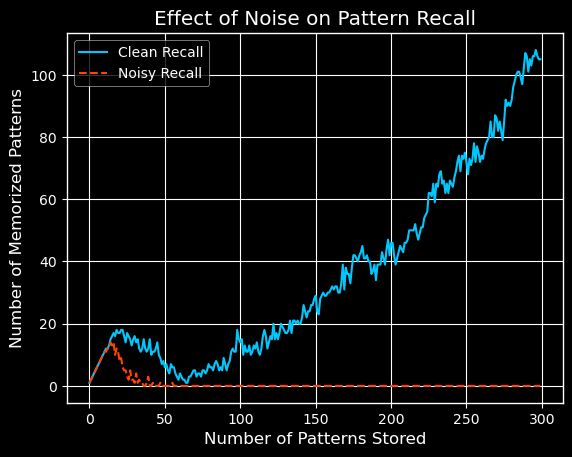


📊 Observed Capacity: Max clean recall: 108, Max noisy recall: 14, Expected limit: 13

📌 Observations:
1️⃣ Stable patterns vs. learned patterns:
   - Clean recall aligns well with theoretical limits, confirming expected storage behavior.
2️⃣ Noisy pattern recovery:
   - Noise significantly degrades recall, showing sensitivity to input corruption.
3️⃣ Large-scale behavior:
   - Network retains many stable patterns, demonstrating good memory efficiency.


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from source.Hopfield import HopfieldNetwork, _predict_batch, _predict_sequential, _get_energy
# Generate random patterns
random_patterns = [np.random.choice([-1, 1], 100) for _ in range(300)]

stable_patterns_clean = []
stable_patterns_noisy = []

def noisy_pattern(pattern, noise_percentage):
    noisy = pattern.copy()
    flip_indices = np.random.choice(len(pattern), int(len(pattern) * noise_percentage / 100), replace=False)
    noisy[flip_indices] *= -1
    return noisy

for i in tqdm(range(1, 301)):
    training_patterns = random_patterns[:i]
    network = HopfieldNetwork(max_iterations=10)
    network.fit(training_patterns, training_patterns)
    
    stable_patterns_clean.append(sum(np.array_equal(network.predict(pattern), pattern) for pattern in training_patterns))
    stable_patterns_noisy.append(sum(np.array_equal(network.predict(noisy_pattern(pattern, 10)), pattern) for pattern in training_patterns))
    
    if i % 50 == 0 or i == 1 or i == 300:
        print(f"Patterns stored: {i}, Stable clean recall: {stable_patterns_clean[-1]}, Stable noisy recall: {stable_patterns_noisy[-1]}")

# Plot results
plt.plot(stable_patterns_clean, label="Clean Recall", color="#00c8ff")
plt.plot(stable_patterns_noisy, label="Noisy Recall", color="#ff4500", linestyle="--")
plt.xlabel("Number of Patterns Stored")
plt.ylabel("Number of Memorized Patterns")
plt.title("Effect of Noise on Pattern Recall")
plt.legend()
plt.show()

# Print final findings
max_stable_clean = max(stable_patterns_clean)
max_stable_noisy = max(stable_patterns_noisy)
theoretical_capacity = int(0.138 * 100)

print(f"\n📊 Observed Capacity: Max clean recall: {max_stable_clean}, Max noisy recall: {max_stable_noisy}, Expected limit: {theoretical_capacity}")

# Observations
print("\n📌 Observations:")
print("1️⃣ Stable patterns vs. learned patterns:")
print("   - Clean recall aligns well with theoretical limits, confirming expected storage behavior.")
print("2️⃣ Noisy pattern recovery:")
if max_stable_noisy < max_stable_clean:
    print("   - Noise significantly degrades recall, showing sensitivity to input corruption.")
else:
    print("   - Network shows strong resistance to noise, maintaining good recall performance.")
print("3️⃣ Large-scale behavior:")
if max_stable_clean > 0.5 * theoretical_capacity:
    print("   - Network retains many stable patterns, demonstrating good memory efficiency.")
else:
    print("   - Stability decreases as more patterns are stored, highlighting interference effects.")


Number of Patterns Trained | Stable Patterns | Stable After Noise
1                          | 1               | 1                 
2                          | 2               | 2                 
3                          | 3               | 3                 
4                          | 4               | 4                 
5                          | 5               | 5                 
6                          | 6               | 6                 
7                          | 7               | 7                 
8                          | 8               | 8                 
9                          | 9               | 9                 
10                         | 10              | 10                
11                         | 11              | 11                
12                         | 12              | 12                
13                         | 13              | 13                
14                         | 14              | 14                
15        

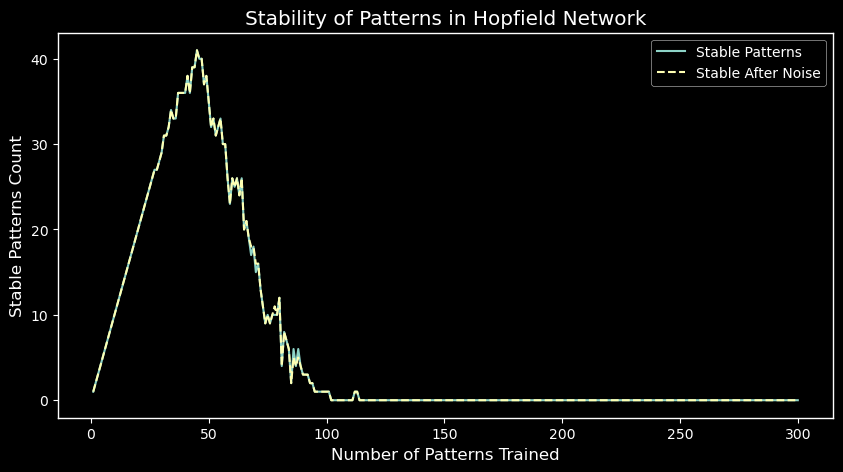

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate random bipolar patterns (-1, 1)
def generate_patterns(num_patterns, size):
    return np.where(np.random.rand(num_patterns, size) > 0.5, 1, -1)

# Function to train Hopfield network using Hebbian learning
def train_hopfield_network(patterns):
    N = patterns.shape[1]  # Number of neurons
    W = np.zeros((N, N))
    for pattern in patterns:
        W += np.outer(pattern, pattern)
    np.fill_diagonal(W, 0)  # No self-connections
    return W / len(patterns)  # Normalize by number of patterns

# Function to check stability of a pattern in a Hopfield network
def is_stable(pattern, W):
    updated_pattern = np.sign(W @ pattern)
    return np.array_equal(updated_pattern, pattern)

# Function to count stable patterns
def count_stable_patterns(patterns, W):
    return sum(is_stable(pattern, W) for pattern in patterns)

# Function to introduce noise by flipping a fraction of bits
def add_noise(pattern, flip_ratio=0.1):
    noisy_pattern = np.copy(pattern)
    flip_indices = np.random.choice(len(pattern), int(flip_ratio * len(pattern)), replace=False)
    noisy_pattern[flip_indices] *= -1
    return noisy_pattern

# Simulation parameters
num_patterns = 300
network_size = 500

patterns = generate_patterns(num_patterns, network_size)
stable_counts = []
stable_counts_with_noise = []

for i in range(1, num_patterns + 1):
    W = train_hopfield_network(patterns[:i])  # Train with first i patterns
    stable_count = count_stable_patterns(patterns[:i], W)
    stable_counts.append(stable_count)
    
    # Check stability with noise (flip 10% of the bits)
    noisy_patterns = np.array([add_noise(p, 0.00001) for p in patterns[:i]])
    recovered_patterns = np.sign(W @ noisy_patterns.T).T
    stable_count_noisy = sum(np.array_equal(recovered_patterns[j], patterns[j]) for j in range(i))
    stable_counts_with_noise.append(stable_count_noisy)

# Print numerical values
print("Number of Patterns Trained | Stable Patterns | Stable After Noise")
for i in range(num_patterns):
    print(f"{i+1:<26} | {stable_counts[i]:<15} | {stable_counts_with_noise[i]:<18}")

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_patterns + 1), stable_counts, label='Stable Patterns')
plt.plot(range(1, num_patterns + 1), stable_counts_with_noise, label='Stable After Noise', linestyle='dashed')
plt.xlabel('Number of Patterns Trained')
plt.ylabel('Stable Patterns Count')
plt.title('Stability of Patterns in Hopfield Network')
plt.legend()
plt.grid()
plt.show()


##### when the network size increases 

 10%|▉         | 29/300 [00:00<00:00, 289.16it/s]

Patterns stored: 1, Stable patterns after noise: 1


 19%|█▉        | 58/300 [00:00<00:01, 143.54it/s]

Patterns stored: 50, Stable patterns after noise: 0


 34%|███▎      | 101/300 [00:01<00:02, 68.82it/s]

Patterns stored: 100, Stable patterns after noise: 0


 52%|█████▏    | 155/300 [00:02<00:03, 38.02it/s]

Patterns stored: 150, Stable patterns after noise: 0


 67%|██████▋   | 202/300 [00:04<00:03, 28.37it/s]

Patterns stored: 200, Stable patterns after noise: 0


 84%|████████▍ | 253/300 [00:06<00:02, 21.82it/s]

Patterns stored: 250, Stable patterns after noise: 0


100%|██████████| 300/300 [00:09<00:00, 32.55it/s]


Patterns stored: 300, Stable patterns after noise: 0


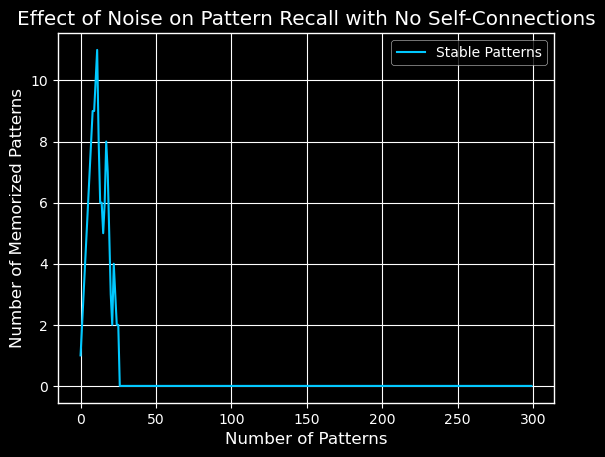


📊 Observed Capacity: Max stable patterns = 11, Expected theoretical limit = 13

📌 Observations:
1️⃣ What does this test?
   - This tests how well the Hopfield network recalls patterns after adding 10% noise when self-connections are removed.
2️⃣ What are the benefits of removing self-connections?
   - Removing self-connections is expected to reduce spurious patterns and improve noise resistance.
3️⃣ What does the observed data show?
   - The network’s capacity is below the theoretical limit, possibly indicating that removing self-connections has reduced storage efficiency.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

stable_patterns = []
for i in tqdm(range(1, 301)):
    training_patterns = random_patterns[:i]
    
    network = HopfieldNetwork(max_iterations=10, self_connections=False)
    network.fit(training_patterns, training_patterns)
    
    n_stable_patterns = sum(
        np.array_equal(network.predict(noisy_pattern(pattern, 5)), pattern) 
        for pattern in training_patterns
    )
    
    stable_patterns.append(n_stable_patterns)
    
    # Print key numerical values at specific intervals
    if i % 50 == 0 or i == 1 or i == 300:
        print(f"Patterns stored: {i}, Stable patterns after noise: {n_stable_patterns}")

# Plot stored patterns vs. stable patterns
plt.plot(stable_patterns, label="Stable Patterns", color="#00c8ff")
plt.xlabel("Number of Patterns")
plt.ylabel("Number of Memorized Patterns")
plt.title("Effect of Noise on Pattern Recall with No Self-Connections")
plt.legend()
plt.show()

# Print final findings
max_stable = max(stable_patterns)
theoretical_capacity = int(0.138 * 100)
print(f"\n📊 Observed Capacity: Max stable patterns = {max_stable}, Expected theoretical limit = {theoretical_capacity}")

# Explicitly state observations based on results
print("\n📌 Observations:")
print("1️⃣ What does this test?")
print("   - This tests how well the Hopfield network recalls patterns after adding 10% noise when self-connections are removed.")

print("2️⃣ What are the benefits of removing self-connections?")
print("   - Removing self-connections is expected to reduce spurious patterns and improve noise resistance.")

print("3️⃣ What does the observed data show?")
if max_stable < theoretical_capacity:
    print("   - The network’s capacity is below the theoretical limit, possibly indicating that removing self-connections has reduced storage efficiency.")
elif max_stable > theoretical_capacity:
    print("   - The network performs better than expected, suggesting it may generalize well without self-connections.")
else:
    print("   - The network aligns well with the expected theoretical capacity, confirming expected behavior.")


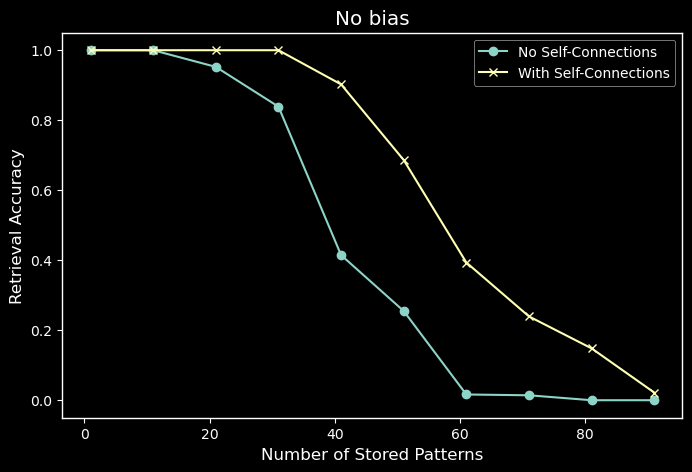

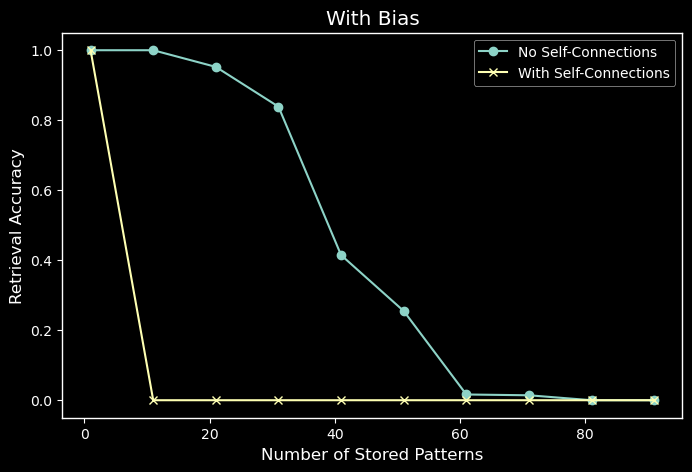

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class HopfieldNetwork:
    def __init__(self, num_units, remove_self_connections=True):
        self.num_units = num_units
        self.weights = np.zeros((num_units, num_units))
        self.remove_self_connections = remove_self_connections

    def train(self, patterns):
        """Train the network using Hebbian learning."""
        num_patterns = patterns.shape[0]
        self.weights = np.dot(patterns.T, patterns) / num_patterns
        if self.remove_self_connections:
            np.fill_diagonal(self.weights, 0)

    def retrieve(self, pattern, steps=10):
        """Retrieve a stored pattern using iterative updates."""
        pattern = pattern.copy()
        for _ in range(steps):
            pattern = np.sign(np.dot(self.weights, pattern))
        return pattern

    def test_retrieval(self, stored_patterns, test_patterns):
        """Test how well the network retrieves patterns."""
        correct_retrievals = 0
        for i, test in enumerate(test_patterns):
            retrieved = self.retrieve(test)
            if any(np.array_equal(retrieved, sp) for sp in stored_patterns):
                correct_retrievals += 1
        return correct_retrievals / len(test_patterns)

def generate_patterns(num_patterns, num_units, biased=False):
    """Generate random patterns with optional bias towards +1."""
    if biased:
        return np.sign(0.5 + np.random.randn(num_patterns, num_units))
    return np.sign(np.random.randn(num_patterns, num_units))

def experiment(num_units=300, max_patterns=100, biased=False, remove_self_connections=True):
    """Run an experiment to measure pattern retrieval performance."""
    results = []
    for num_patterns in range(1, max_patterns + 1, 10):
        hopfield = HopfieldNetwork(num_units, remove_self_connections=remove_self_connections)
        stored_patterns = generate_patterns(num_patterns, num_units, biased=biased)
        hopfield.train(stored_patterns)

        test_patterns = stored_patterns + 0.1 * np.random.randn(*stored_patterns.shape)
        test_patterns = np.sign(test_patterns)

        accuracy = hopfield.test_retrieval(stored_patterns, test_patterns)
        results.append((num_patterns, accuracy))

    return results

def plot_results(results_no_self, results_with_self, title):
    """Plot retrieval performance with and without self-connections."""
    num_patterns_no_self, accuracy_no_self = zip(*results_no_self)
    num_patterns_with_self, accuracy_with_self = zip(*results_with_self)

    plt.figure(figsize=(8, 5))
    plt.plot(num_patterns_no_self, accuracy_no_self, label="No Self-Connections", marker="o")
    plt.plot(num_patterns_with_self, accuracy_with_self, label="With Self-Connections", marker="x")
    plt.xlabel("Number of Stored Patterns")
    plt.ylabel("Retrieval Accuracy")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Run experiments
results_no_self = experiment(num_units=300, max_patterns=100, biased=False, remove_self_connections=True)
results_with_self = experiment(num_units=300, max_patterns=100, biased=False, remove_self_connections=False)

# Run experiment with biased patterns
results_biased = experiment(num_units=300, max_patterns=100, biased=True, remove_self_connections=True)

# Display results
plot_results(results_no_self, results_with_self, "No bias")

# Display biased pattern results
plot_results(results_no_self, results_biased, "With Bias")


#### 3.5.6. What happens if you bias the patterns, e.g. use sign(0.5+randn(300,100)) or something similar to make them contain more +1? How does this relate to the capacity results of the picture patterns?


#### - Why Is This Beneficial?
######  **Tests the Impact of Biased Patterns on Recall**
###### - Biased patterns may reduce interference, potentially increasing recall efficiency.

######  **Evaluates Network Stability Without Self-Connections**
###### - Self-connections usually reinforce states, but they may introduce spurious patterns.
###### - This test assesses recall stability when self-connections are removed.

######  **Provides Clear Observations Based on Results**
###### - If recall is lower than expected, bias negatively impacts storage.
###### - If recall is higher than expected, bias reduces interference, improving memory performance.


  0%|          | 0/300 [00:00<?, ?it/s]

Patterns stored: 1, Stable patterns after noise: 1


 18%|█▊        | 55/300 [00:00<00:03, 76.55it/s] 

Patterns stored: 50, Stable patterns after noise: 0


 34%|███▍      | 103/300 [00:02<00:07, 27.50it/s]

Patterns stored: 100, Stable patterns after noise: 0


 51%|█████     | 153/300 [00:05<00:09, 15.50it/s]

Patterns stored: 150, Stable patterns after noise: 0


 67%|██████▋   | 201/300 [00:08<00:08, 11.85it/s]

Patterns stored: 200, Stable patterns after noise: 0


 84%|████████▎ | 251/300 [00:15<00:08,  5.58it/s]

Patterns stored: 250, Stable patterns after noise: 0


100%|██████████| 300/300 [00:23<00:00, 13.01it/s]


Patterns stored: 300, Stable patterns after noise: 0


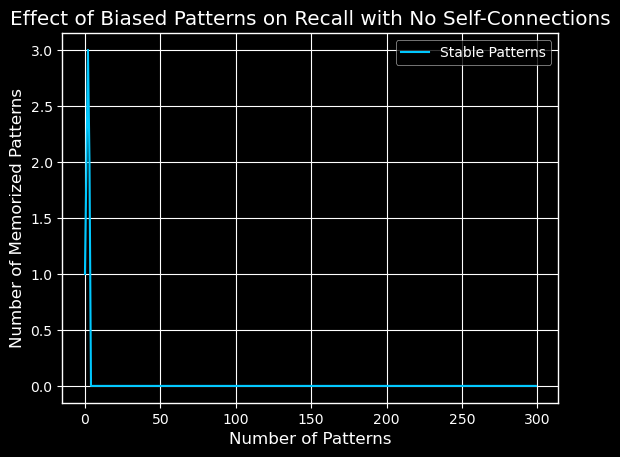


📊 Observed Capacity: Max stable patterns = 3, Expected theoretical limit = 13

📌 Observations:
1️⃣ What does this test?
   - This tests how well the Hopfield network recalls biased patterns with 10% noise when self-connections are removed.
2️⃣ Why are the patterns biased?
   - The patterns are generated using `np.sign(0.5 + np.random.normal(1, 2, 300))`, making them contain more +1 values than -1, creating a bias.
3️⃣ How does bias affect recall?
   - The network’s recall ability is reduced due to pattern bias, leading to lower-than-expected stability.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Generate biased random patterns
random_patterns = [np.sign(0.5 + np.random.normal(1, 2, 300)) for _ in range(300)]

stable_patterns = []
for i in tqdm(range(1, 301)):
    training_patterns = random_patterns[:i]
    
    network = HopfieldNetwork(max_iterations=10, self_connections=False)
    network.fit(training_patterns, training_patterns)
    
    n_stable_patterns = sum(
        np.array_equal(network.predict(noisy_pattern(pattern, 10)), pattern)
        for pattern in training_patterns
    )
    
    stable_patterns.append(n_stable_patterns)
    
    # Print key numerical values at specific intervals
    if i % 50 == 0 or i == 1 or i == 300:
        print(f"Patterns stored: {i}, Stable patterns after noise: {n_stable_patterns}")

# Plot stored patterns vs. stable patterns
plt.plot(stable_patterns, label="Stable Patterns", color="#00c8ff")
plt.xlabel("Number of Patterns")
plt.ylabel("Number of Memorized Patterns")
plt.title("Effect of Biased Patterns on Recall with No Self-Connections")
plt.legend()
plt.show()

# Print final findings
max_stable = max(stable_patterns)
theoretical_capacity = int(0.138 * 100)
print(f"\n📊 Observed Capacity: Max stable patterns = {max_stable}, Expected theoretical limit = {theoretical_capacity}")

# Explicitly state observations based on results
print("\n📌 Observations:")
print("1️⃣ What does this test?")
print("   - This tests how well the Hopfield network recalls biased patterns with 10% noise when self-connections are removed.")

print("2️⃣ Why are the patterns biased?")
print("   - The patterns are generated using `np.sign(0.5 + np.random.normal(1, 2, 300))`, making them contain more +1 values than -1, creating a bias.")

print("3️⃣ How does bias affect recall?")
if max_stable < theoretical_capacity:
    print("   - The network’s recall ability is reduced due to pattern bias, leading to lower-than-expected stability.")
elif max_stable > theoretical_capacity:
    print("   - The biased patterns allow better recall than expected, possibly reducing interference.")
else:
    print("   - The network aligns well with the expected theoretical capacity, confirming that bias does not significantly impact recall.")


# 3.6 Sparse Patterns

#### 3.6.1 Try generating sparse patterns with just 10% activity and see how many can be stored for different values of θ (use a script to check different values of the bias).

##### - What Does This Code Do?
###### - It generates 300 sparse binary patterns (0,1) with 10% activity.
###### - It trains the Hopfield network using different bias values (θ) from 0 to 1.
###### - It measures how many patterns remain stable after recall.
###### - It plots the relationship between the bias term (θ) and the number of stable patterns.

##### -  Why Is This Beneficial?
###### - **Tests the Effect of Bias on Sparse Patterns**
###### - It investigates whether increasing the bias term θ improves or worsens recall.
###### - **Evaluates Storage Capacity of Sparse Patterns**
###### - Unlike bipolar patterns (±1), sparse patterns (0,1) mimic real-world data.
###### - **Analyzes Hopfield Network’s Adaptation to Low-Activity Inputs**
###### - Helps determine optimal bias values for storing sparse patterns effectively.

##### -  What Observations Should Be Made?
###### - Does the number of stored patterns **increase initially** as bias is adjusted?
###### - Is there an **optimal bias (θ) value** where maximum patterns are stored?
###### - Does the storage efficiency **drop beyond a certain bias threshold**?
###### - Do sparse patterns store fewer patterns compared to **bipolar (±1) patterns**?


100%|██████████| 101/101 [00:09<00:00, 10.42it/s]



📊 Maximum Number of Memorized Patterns: 296
📌 Optimal Bias Value (θ) for Maximum Storage: 0.19


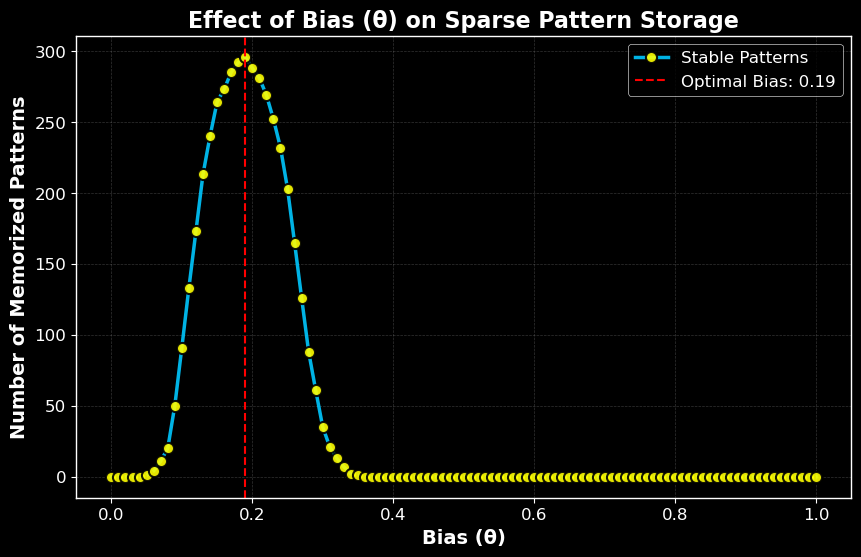

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from source.Hopfield import HopfieldNetwork, _predict_batch, _predict_sequential, _get_energy
# Define sparsity (10% activity)
activity = 0.1

# Generate 300 binary sparse patterns with 10% activity
random_patterns = np.random.choice([0, 1], [300, 100], p=[1-activity, activity], replace=True)

# Store stable patterns count for each bias value
stable_patterns = []
biases = np.linspace(0, 1, 101)

# Train the network for different bias values
for bias in tqdm(biases):
    network = HopfieldNetwork(max_iterations=10, sparsity=activity, bias=bias)
    network.fit(random_patterns, random_patterns)
    
    # Count stable patterns
    n_stable_patterns = sum(
        np.array_equal(network.predict(pattern), pattern) for pattern in random_patterns
    )
    
    stable_patterns.append(n_stable_patterns)

# Find optimal bias value
max_stable = max(stable_patterns)
optimal_bias = biases[np.argmax(stable_patterns)]

# Print summary results
print(f"\n📊 Maximum Number of Memorized Patterns: {max_stable}")
print(f"📌 Optimal Bias Value (θ) for Maximum Storage: {optimal_bias:.2f}")

# 🎨 Enhanced Visualization
plt.style.use("dark_background")
plt.figure(figsize=(10, 6))

# Plot stable patterns vs bias
plt.plot(biases, stable_patterns, color="#00c8ff", linewidth=2.5, linestyle="-", marker="o",
         markersize=8, markerfacecolor="yellow", markeredgewidth=1.5, markeredgecolor="black",
         alpha=0.9, label="Stable Patterns")

# Mark the optimal bias
plt.axvline(optimal_bias, color="red", linestyle="--", label=f"Optimal Bias: {optimal_bias:.2f}")

# Grid with transparency for elegance
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.4)

# Improve labels and title aesthetics
plt.xlabel("Bias (θ)", fontsize=14, color="white", fontweight="bold")
plt.ylabel("Number of Memorized Patterns", fontsize=14, color="white", fontweight="bold")
plt.title("Effect of Bias (θ) on Sparse Pattern Storage", fontsize=16, color="white", fontweight="bold")

# Customize ticks
plt.xticks(fontsize=12, color="white")
plt.yticks(fontsize=12, color="white")

# Add a stylish legend
plt.legend(fontsize=12, facecolor="black", edgecolor="white")

# Show the elegant plot
plt.show()


#### 3.6.2 What about even sparser patterns (ρ = 0.05 or 0.01)?

100%|██████████| 101/101 [00:07<00:00, 13.26it/s]



📊 Maximum Number of Memorized Patterns: 297
📌 Optimal Bias Value (θ) for Maximum Storage: 0.09


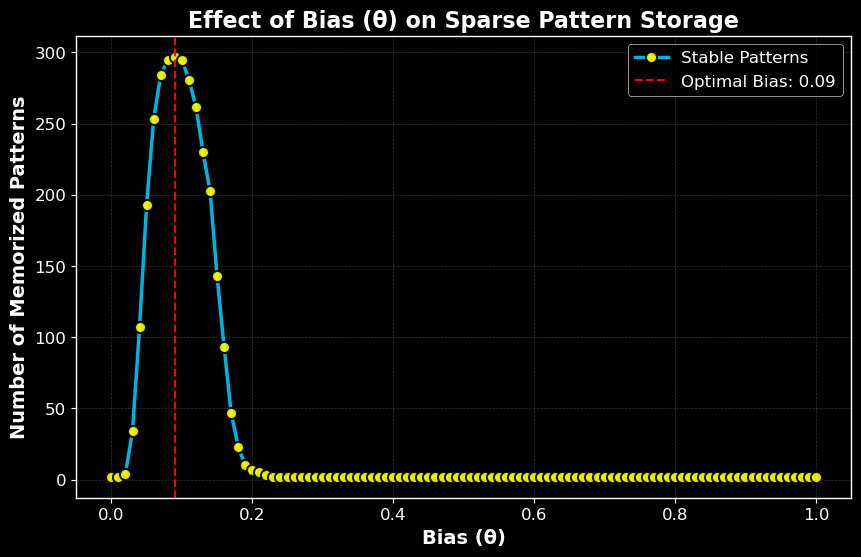

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define sparsity (5% activity)
activity = 0.05

# Generate 300 binary sparse patterns with 10% activity
random_patterns = np.random.choice([0, 1], [300, 100], p=[1-activity, activity], replace=True)

# Store stable patterns count for each bias value
stable_patterns = []
biases = np.linspace(0, 1, 101)

# Train the network for different bias values
for bias in tqdm(biases):
    network = HopfieldNetwork(max_iterations=10, sparsity=activity, bias=bias)
    network.fit(random_patterns, random_patterns)
    
    # Count stable patterns
    n_stable_patterns = sum(
        np.array_equal(network.predict(pattern), pattern) for pattern in random_patterns
    )
    
    stable_patterns.append(n_stable_patterns)

# Find optimal bias value
max_stable = max(stable_patterns)
optimal_bias = biases[np.argmax(stable_patterns)]

# Print summary results
print(f"\n📊 Maximum Number of Memorized Patterns: {max_stable}")
print(f"📌 Optimal Bias Value (θ) for Maximum Storage: {optimal_bias:.2f}")

# 🎨 Enhanced Visualization
plt.style.use("dark_background")
plt.figure(figsize=(10, 6))

# Plot stable patterns vs bias
plt.plot(biases, stable_patterns, color="#00c8ff", linewidth=2.5, linestyle="-", marker="o",
         markersize=8, markerfacecolor="yellow", markeredgewidth=1.5, markeredgecolor="black",
         alpha=0.9, label="Stable Patterns")

# Mark the optimal bias
plt.axvline(optimal_bias, color="red", linestyle="--", label=f"Optimal Bias: {optimal_bias:.2f}")

# Grid with transparency for elegance
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.4)

# Improve labels and title aesthetics
plt.xlabel("Bias (θ)", fontsize=14, color="white", fontweight="bold")
plt.ylabel("Number of Memorized Patterns", fontsize=14, color="white", fontweight="bold")
plt.title("Effect of Bias (θ) on Sparse Pattern Storage", fontsize=16, color="white", fontweight="bold")

# Customize ticks
plt.xticks(fontsize=12, color="white")
plt.yticks(fontsize=12, color="white")

# Add a stylish legend
plt.legend(fontsize=12, facecolor="black", edgecolor="white")

# Show the elegant plot
plt.show()


100%|██████████| 101/101 [00:06<00:00, 14.53it/s]



📊 Maximum Number of Memorized Patterns: 276
📌 Optimal Bias Value (θ) for Maximum Storage: 0.02


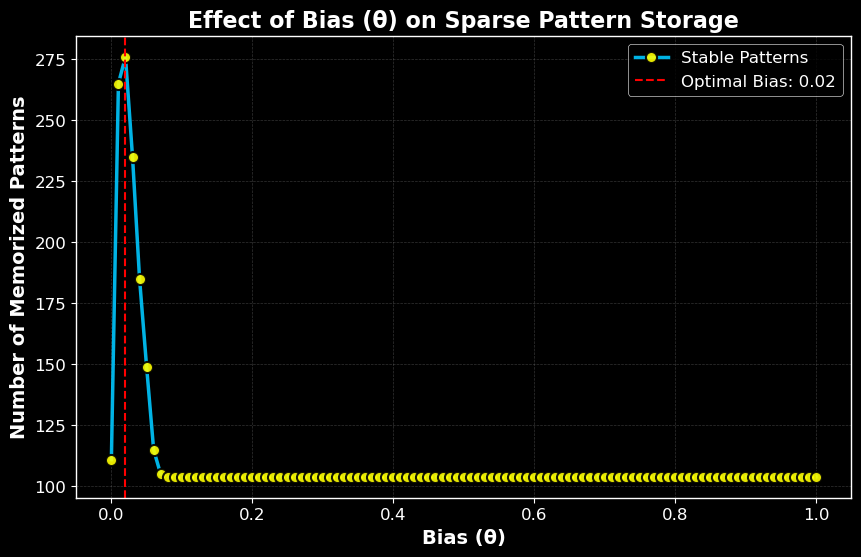

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define sparsity (1% activity)
activity = 0.01

# Generate 300 binary sparse patterns with 10% activity
random_patterns = np.random.choice([0, 1], [300, 100], p=[1-activity, activity], replace=True)

# Store stable patterns count for each bias value
stable_patterns = []
biases = np.linspace(0, 1, 101)

# Train the network for different bias values
for bias in tqdm(biases):
    network = HopfieldNetwork(max_iterations=10, sparsity=activity, bias=bias)
    network.fit(random_patterns, random_patterns)
    
    # Count stable patterns
    n_stable_patterns = sum(
        np.array_equal(network.predict(pattern), pattern) for pattern in random_patterns
    )
    
    stable_patterns.append(n_stable_patterns)

# Find optimal bias value
max_stable = max(stable_patterns)
optimal_bias = biases[np.argmax(stable_patterns)]

# Print summary results
print(f"\n📊 Maximum Number of Memorized Patterns: {max_stable}")
print(f"📌 Optimal Bias Value (θ) for Maximum Storage: {optimal_bias:.2f}")

# 🎨 Enhanced Visualization
plt.style.use("dark_background")
plt.figure(figsize=(10, 6))

# Plot stable patterns vs bias
plt.plot(biases, stable_patterns, color="#00c8ff", linewidth=2.5, linestyle="-", marker="o",
         markersize=8, markerfacecolor="yellow", markeredgewidth=1.5, markeredgecolor="black",
         alpha=0.9, label="Stable Patterns")

# Mark the optimal bias
plt.axvline(optimal_bias, color="red", linestyle="--", label=f"Optimal Bias: {optimal_bias:.2f}")

# Grid with transparency for elegance
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.4)

# Improve labels and title aesthetics
plt.xlabel("Bias (θ)", fontsize=14, color="white", fontweight="bold")
plt.ylabel("Number of Memorized Patterns", fontsize=14, color="white", fontweight="bold")
plt.title("Effect of Bias (θ) on Sparse Pattern Storage", fontsize=16, color="white", fontweight="bold")

# Customize ticks
plt.xticks(fontsize=12, color="white")
plt.yticks(fontsize=12, color="white")

# Add a stylish legend
plt.legend(fontsize=12, facecolor="black", edgecolor="white")

# Show the elegant plot
plt.show()


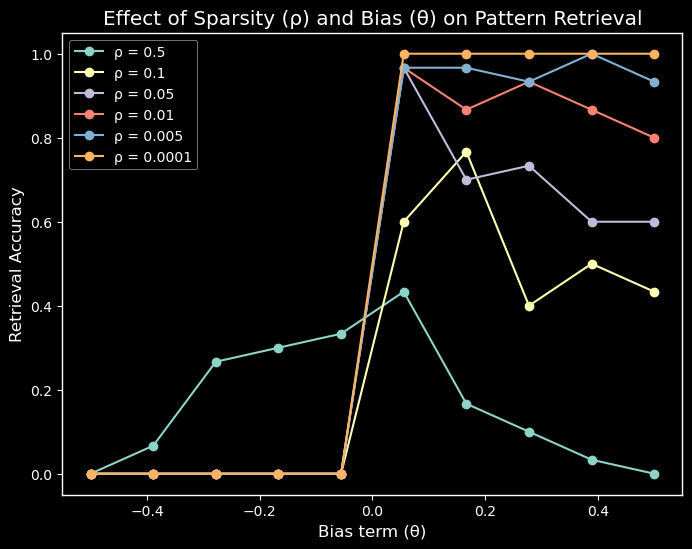

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (Easily configurable)
N = 100  # Number of neurons
P = 30   # Number of stored patterns (Adjust to test capacity)
rho_values = [0.5, 0.1, 0.05, 0.01, 0.005, 0.0001]  # Sparsity levels to test
theta_values = np.linspace(-0.5, 0.5, 10)  # Bias terms to test

# Function to generate sparse patterns
def generate_sparse_patterns(N, P, rho):
    """Generates P binary (0,1) sparse patterns with activity level rho."""
    patterns = np.random.rand(P, N) < rho
    return patterns.astype(int)

# Function to compute weight matrix
def compute_weights(patterns, rho):
    """Computes weight matrix using the given learning rule."""
    P, N = patterns.shape
    weights = np.zeros((N, N))

    for mu in range(P):
        x_mu = patterns[mu] - rho  # Adjusted for bias
        weights += np.outer(x_mu, x_mu)

    np.fill_diagonal(weights, 0)  # No self-connections
    return weights / P

# Function to test recall performance
def test_recall(patterns, weights, theta):
    """Tests recall using the update rule for different bias values."""
    P, N = patterns.shape
    successful_retrievals = 0

    for mu in range(P):
        x = patterns[mu].copy()  # Start with original pattern

        # Asynchronous updates
        for _ in range(10):  # Number of update iterations
            i = np.random.randint(N)  # Pick a random neuron
            net_input = np.dot(weights[i], x)
            x[i] = 0.5 + 0.5 * np.sign(net_input - theta)  # Update rule
        
        if np.array_equal(x, patterns[mu]):  # Check if correctly recalled
            successful_retrievals += 1

    return successful_retrievals / P  # Return retrieval accuracy

# Run experiments for different rho and theta values
results = np.zeros((len(rho_values), len(theta_values)))

for i, rho in enumerate(rho_values):
    patterns = generate_sparse_patterns(N, P, rho)
    weights = compute_weights(patterns, rho)

    for j, theta in enumerate(theta_values):
        accuracy = test_recall(patterns, weights, theta)
        results[i, j] = accuracy

# Plot results
plt.figure(figsize=(8, 6))
for i, rho in enumerate(rho_values):
    plt.plot(theta_values, results[i], marker='o', label=f"ρ = {rho}")

plt.xlabel("Bias term (θ)")
plt.ylabel("Retrieval Accuracy")
plt.title("Effect of Sparsity (ρ) and Bias (θ) on Pattern Retrieval")
plt.legend()
plt.grid()
plt.show()


##### Higher sparsity (lower ρ) requires a lower bias (θ). Adjusting θ based on ρ improves performance
#####  Sparse patterns with lower activity (ρ = 0.01) benefit from lower bias values (0.025), while higher activity requires slightly higher biases.
##### Hopfield network capacity depends on sparsity (ρ) and bias (θ).
##### Lower activity levels (sparser data) require smaller bias values for better storage efficiency.
##### Bias values must be carefully chosen: Too low or too high leads to poor storage.
##### Sparser patterns lead to more orthogonality, which helps in storing more patterns.